In [1]:
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 30

We will always use the **4th order Runge-Kutta method**, which in vector form is

$\quad\displaystyle\begin{equation} \mathbf{x}_{n+1} = \mathbf{x}_n + \frac{\mathbf{k}_1 + 2\mathbf{k}_2 + 2\mathbf{k}_3 + \mathbf{k}_4}{6} \end{equation}$

where                                                                                                                               
$\qquad\begin{align}
\mathbf{k}_1 &=  \Delta \mathrm{t} \ \mathbf{f}(\mathbf{x}_n) \\
\mathbf{k}_2 &= \Delta \mathrm{t} \ \mathbf{f}\big(\mathbf{x}_n + \frac{\mathbf{k}_1}{2}\big)  \\
\mathbf{k}_3 &= \Delta \mathrm{t} \ \mathbf{f}\big(\mathbf{x}_n + \frac{\mathbf{k}_2}{2}\big)  \\
\mathbf{k}_4 &= \Delta \mathrm{t} \ \mathbf{f}\big(\mathbf{x}_n + \mathbf{k}_3\big) 
\end{align}$


In [2]:
def RK4(f, t_span, const, dt, y):
    t = np.arange(t_span[0], t_span[1], dt)
    rhs = np.zeros((len(t), len(y)))
    rhs[0] = y
    for i in range(1, len(t)):
        k1 = dt * np.array(f(t[i-1], rhs[i-1], const))
        k2 = dt * np.array(f(t[i-1] + 0.5*dt, rhs[i-1] + 0.5*k1, const))
        k3 = dt * np.array(f(t[i-1] + 0.5*dt, rhs[i-1] + 0.5*k2, const))
        k4 = dt * np.array(f(t[i-1] + dt, rhs[i-1] + k3, const))
        rhs[i] = rhs[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, rhs

## Damped Harmonic Oscillation
# $\displaystyle{\qquad\qquad\ddot{x}+2\beta\dot{x}+\omega_0^2 x=0}$
# $\displaystyle{\qquad\qquad\ddot{x}=-2\beta\dot{x}-\omega_0^2 x}$
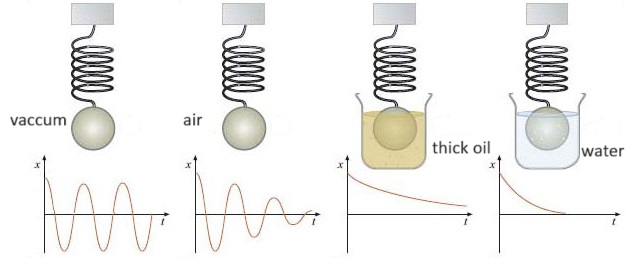



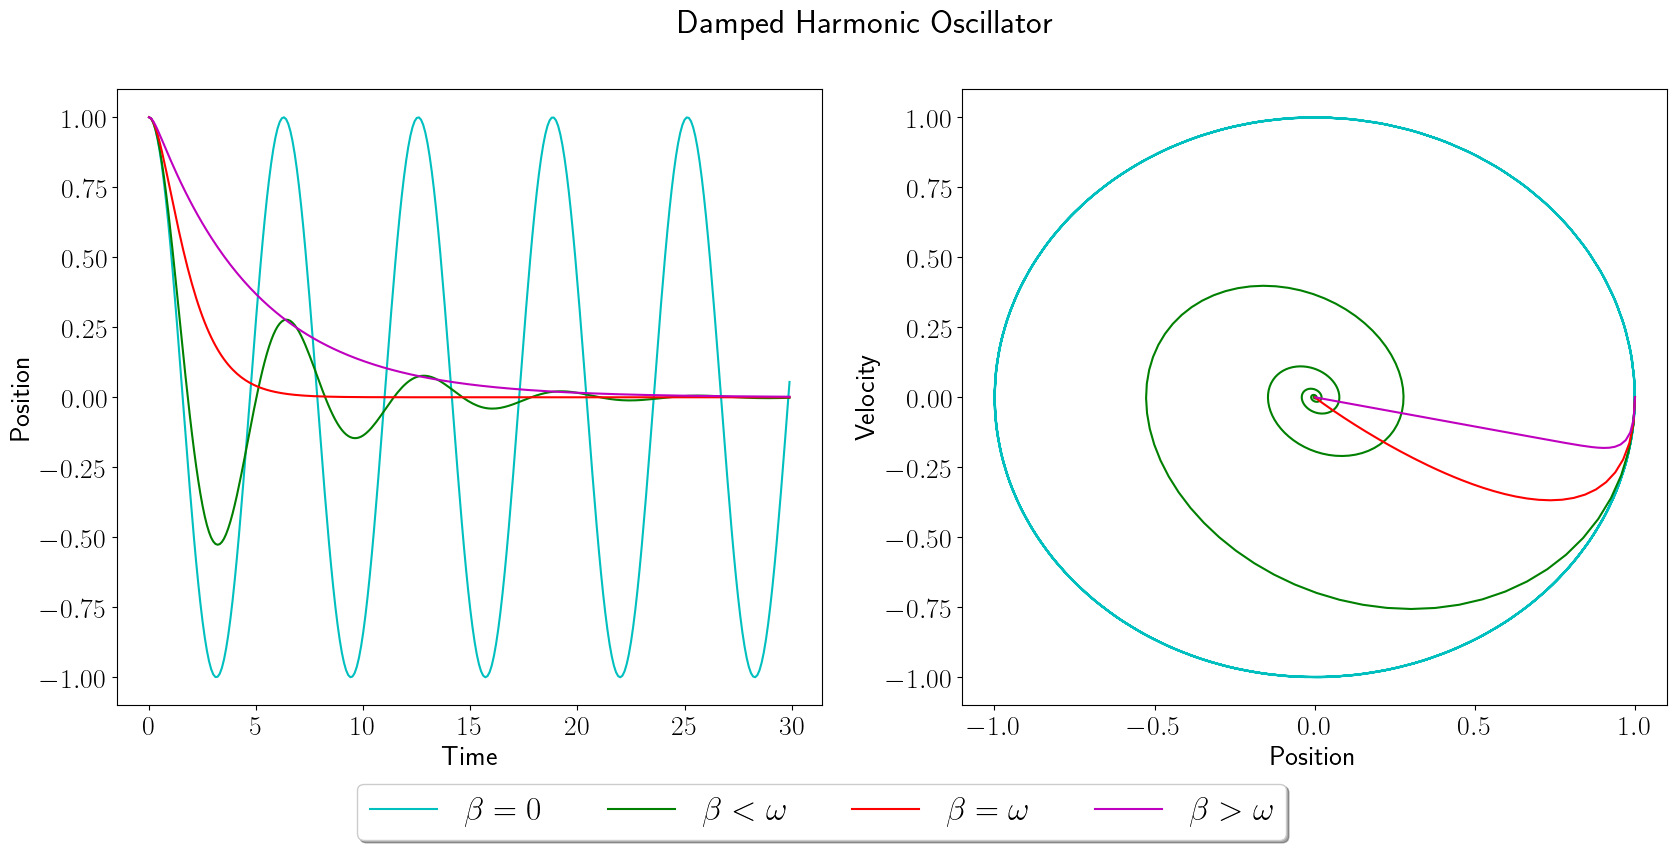

In [3]:
def f(t,y,const):
    rhs = [0]*(2)
    w,b = const
    rhs[0] = y[1]
    rhs[1] =  - 2*b*y[1] - w**2*y[0]
    return rhs

W = 1.0                      # natural angular frequency 
B = [0.0, 0.2, 1.0, 2.5 ]    # damping factor 
dt = 0.1                     # step size
t_span = [0, 30.]            # time space
X0 = [1., 0.]                # initial conditions of dependent variable 

fig = plt.figure(figsize=(20,8))
gs=fig.add_gridspec(1,2)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
bl = [r'$\beta=0$', r'$\beta<\omega$', r'$\beta=\omega$', r'$\beta>\omega$']
colors = ['c', 'g', 'r', 'm']

for i, b in enumerate(B):
    const = W, b
    t, rhs = RK4(f, t_span, const, dt, X0)
    xx, yy = rhs[:,0], rhs[:,1]
    ax1.plot(t, xx, label=bl[i], color=colors[i])
    ax2.plot(xx, yy, color=colors[i])

ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.legend(fontsize=24,loc='upper center', bbox_to_anchor=(1, -0.1),  fancybox=True, shadow=True, ncol=4)
ax2.set_xlabel('Position')
ax2.set_ylabel('Velocity')
fig.suptitle('Damped Harmonic Oscillator')
plt.show()

In 1961 $\bf{\text{Edward Lorenz}}$ used a simplified version of the hydrodynamic equations including convection, viscosity, and gravity to predict weather patterns.                                                   
The computations were so sensitive to parameter values that at first he thought he had a numerical problem,                
though eventually realized that the system was chaotic **[Peitgen et al.(94),Motter & Campbell(13)].**                         
$\bf{\text{Lorenz’s equations}}$ with simplified variables are                                                                                                          
$ \qquad \mathbf{ \dot{x}= \delta(y-x) } $                                                                                               
$ \qquad \mathbf{ \dot{y}= x(\rho-z)-y }$                                                                                              
$ \qquad \mathbf{ \dot{z}=xy-{\beta z} }$                                                                                                                   
where $x(t)$ is a measure of fluid velocity as a function of time $t, y(t)$ and $z(t)$ are                                  
measures of the $y$ and $z$ temperature distributions, and $\sigma,\rho,$ and $\beta$ are parameters.                        
The $xz$ and $xy$ terms make these equations non-linear.                                                                    
1. Modify your ODE solver to handle these three, simultaneous Lorenz equations.                                              
2. To start, use parameter values $\mathbf{\sigma = 10, \rho = \frac{8}{3},}$ and $\mathbf{\beta = 28}$.                                              
3. Make sure to use a small enough step size so that good precision is obtained.                                                  
You must have confidence that you are seeing chaos and not numerical error.                                                       
4. Makes plots of $x$ versus $t, y$ versus $t,$ and $z$ versus $t.$                                                          
5. The initial behaviors in these plots are called “transients” and are not considered dynamically interesting.        
Leave off these transients in the plots to follow.                                                                           
6. Make a **phase space** plot of $z(t)$ versus $x(t)$.                                                                    
The distorted, number eightlike figures you obtain  are called Lorenz attractors, “attractors” because even chaotic solutions tend to be attracted to them.                                                                                             
7. Make **phase space** plots of $y(t)$ versus $x(t)$ and $z(t)$ versus $y(t)$.                                                         
8. Make a 3-D plot of $x(t)$ versus $y(t)$ versus $z(t)$.                                                                       
9. The parameters given to you should lead to chaotic solutions.                                                       
Check this claim by finding the smallest change you can make in a parameter that still produce different answers.           
10. Using numerical integration, compute the $\bf{\text{Lorenz map}}$.                                                                      
11. Using numerical integration, compute the . Make a $\bf{\text{Poincaré mapping}}$  of the transverse section where $z=r-1$                                                                                                                              
(A $\bf{\text{Poincaré mapping}}$ is the intersection of a periodic orbit in the phase space with a lower-dimensional subspace.)                                                   
12. Estimate the $\it{\text{largest }}\bf{\text{Liapunov exponent}}$ of two nearby trajectories for the Lorenz system.                


In [4]:
def Lf(t,y,const):      
    rhs = [0]*(3)                        # coupled eqns
    sigma, beta, rho = const             # constant in Lorentz eqns
    rhs[0] = -sigma*(y[0] - y[1])        # xdot =  -sigma*(x-y)
    rhs[1] = y[0]*(rho - y[2]) - y[1]    # ydot = x*(r-z)-y
    rhs[2] = -beta*y[2] + y[0]*y[1]      # zdot = -b*z+x*y
    return rhs

### Lorenz Map
Given a list of numbers $ \{z_1, z_2, \ldots, z_n\}$, the algorithm aims to identify local maxima,                          
which are elements in the list that are greater than both their preceding and succeeding elements (if they exist).                              
Here's a mathematical interpretation of each step:                                                                             
1.  Let $ n $ be the length of the list of numbers, i.e., $ n = | \{z_1, z_2, \ldots, z_n\} | $.   
2.  If $ n \geq 2 $, check the first element $z_1$:                                                       - If $z_1 > z_2 $, add $ z_1 $ to $ M $. This implies that $z_1$ is a local maximum.                     
3.  If $n > 3$, loop through the elements from index 2 to $n-1$ (inclusive):                     
  For each element $ z_i $ at index $i$, check if it is greater than its preceding $ z_{i-1} $ and succeeding $ z_{i+1} $ elements:                                                                                                                         
       If $ z_i > z_{i-1}$ and $ z_i > z_{i+1} $, add $ z_i $ to $M$.                                                      
4.  Check the last element $ z_n $:                                                                                                                     
      If $z_n > z_{n-1}$, add $z_n$ to $M$. This implies that $z_n$ is a local maximum.                                           
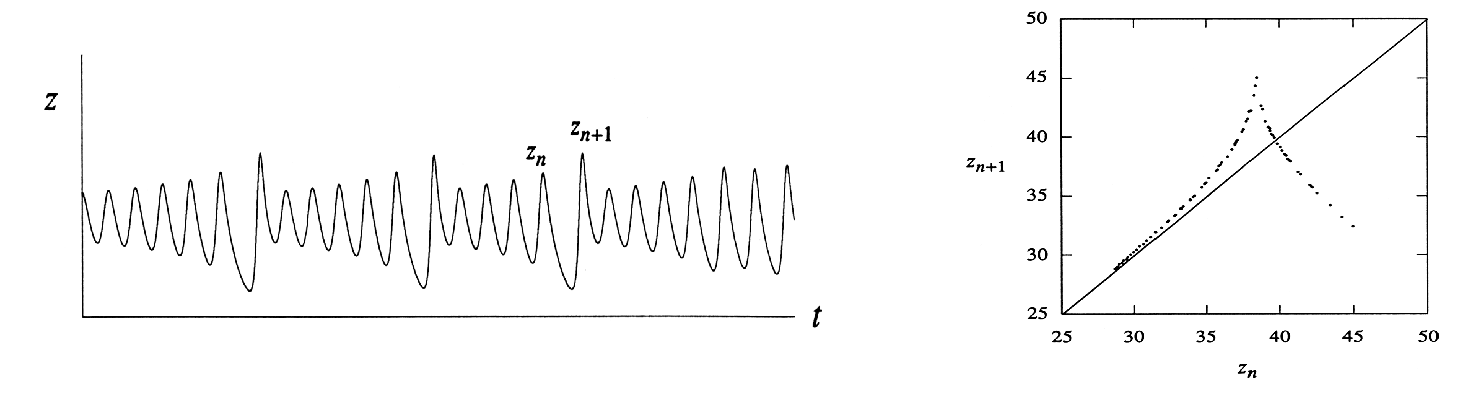

In [5]:
def FindMaxima(z):
    M = []
    n = len(z)
    if n >= 2:
        if z[0] > z[1]:
              M.append(z[0])

    if n > 3:
        for i in range(1, n-1):     
            if z[i] > z[i-1] and z[i] > z[i+1]:
                M.append(z[i])
    
    if z[n-1] > z[n-2]:    
        M.append(z[n-1])        
    return M

We use the Slope intercept form for the straight line **$\quad \displaystyle{ y = mx + c }$**                                         
where                                                                                                                      
- $m$ is the slope                                                                                                         
- $c$ is the y-intercept

Best fit of Linear regressions:                                                                                                                  
$\qquad \displaystyle{m = \frac{N\sum x_i y_i - \sum x_i \sum y_i}{N\sum x_i^2 - \big(\sum x_i \big)^2} \qquad c = \frac{\sum y_i \sum x_i^2 - \sum x_i \sum x_i y_i}{N\sum x_i^2 - \big(\sum x_i\big)^2} }$



In [6]:
def fit(x,y):
    n = len(x)
    sx = sum(x)
    sy = sum(y)
    sx2 = sum(x*x)
    sxy = sum(x*y)
    b = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy) / b
    c = (sy*sx2 - sx*sxy) / b
    return m,c

### Poincaré Section 

In [7]:
# Generate Poincaré section
def generate_poincare_section(x,y,z, t, r):
    
    # Define Poincaré section condition
    def poincare_c(z, r):
        return z - (r - 1)
    
    poincare_x = []
    poincare_y = []
    
    for i in range(1, len(t)):
        
        if poincare_c(z[i], r) * poincare_c(z[i-1], r) < 0:
            # Interpolate to find more precise (x, y) values
            alpha = abs(poincare_c(z[i], r) / (poincare_c(z[i], r) - poincare_c(z[i-1], r)))
            x_p = x[i-1] + alpha * (x[i] - x[i-1])
            y_p = y[i-1] + alpha * (y[i] - y[i-1])
            poincare_x.append(x_p)
            poincare_y.append(y_p)
    return np.array([poincare_x, poincare_y])

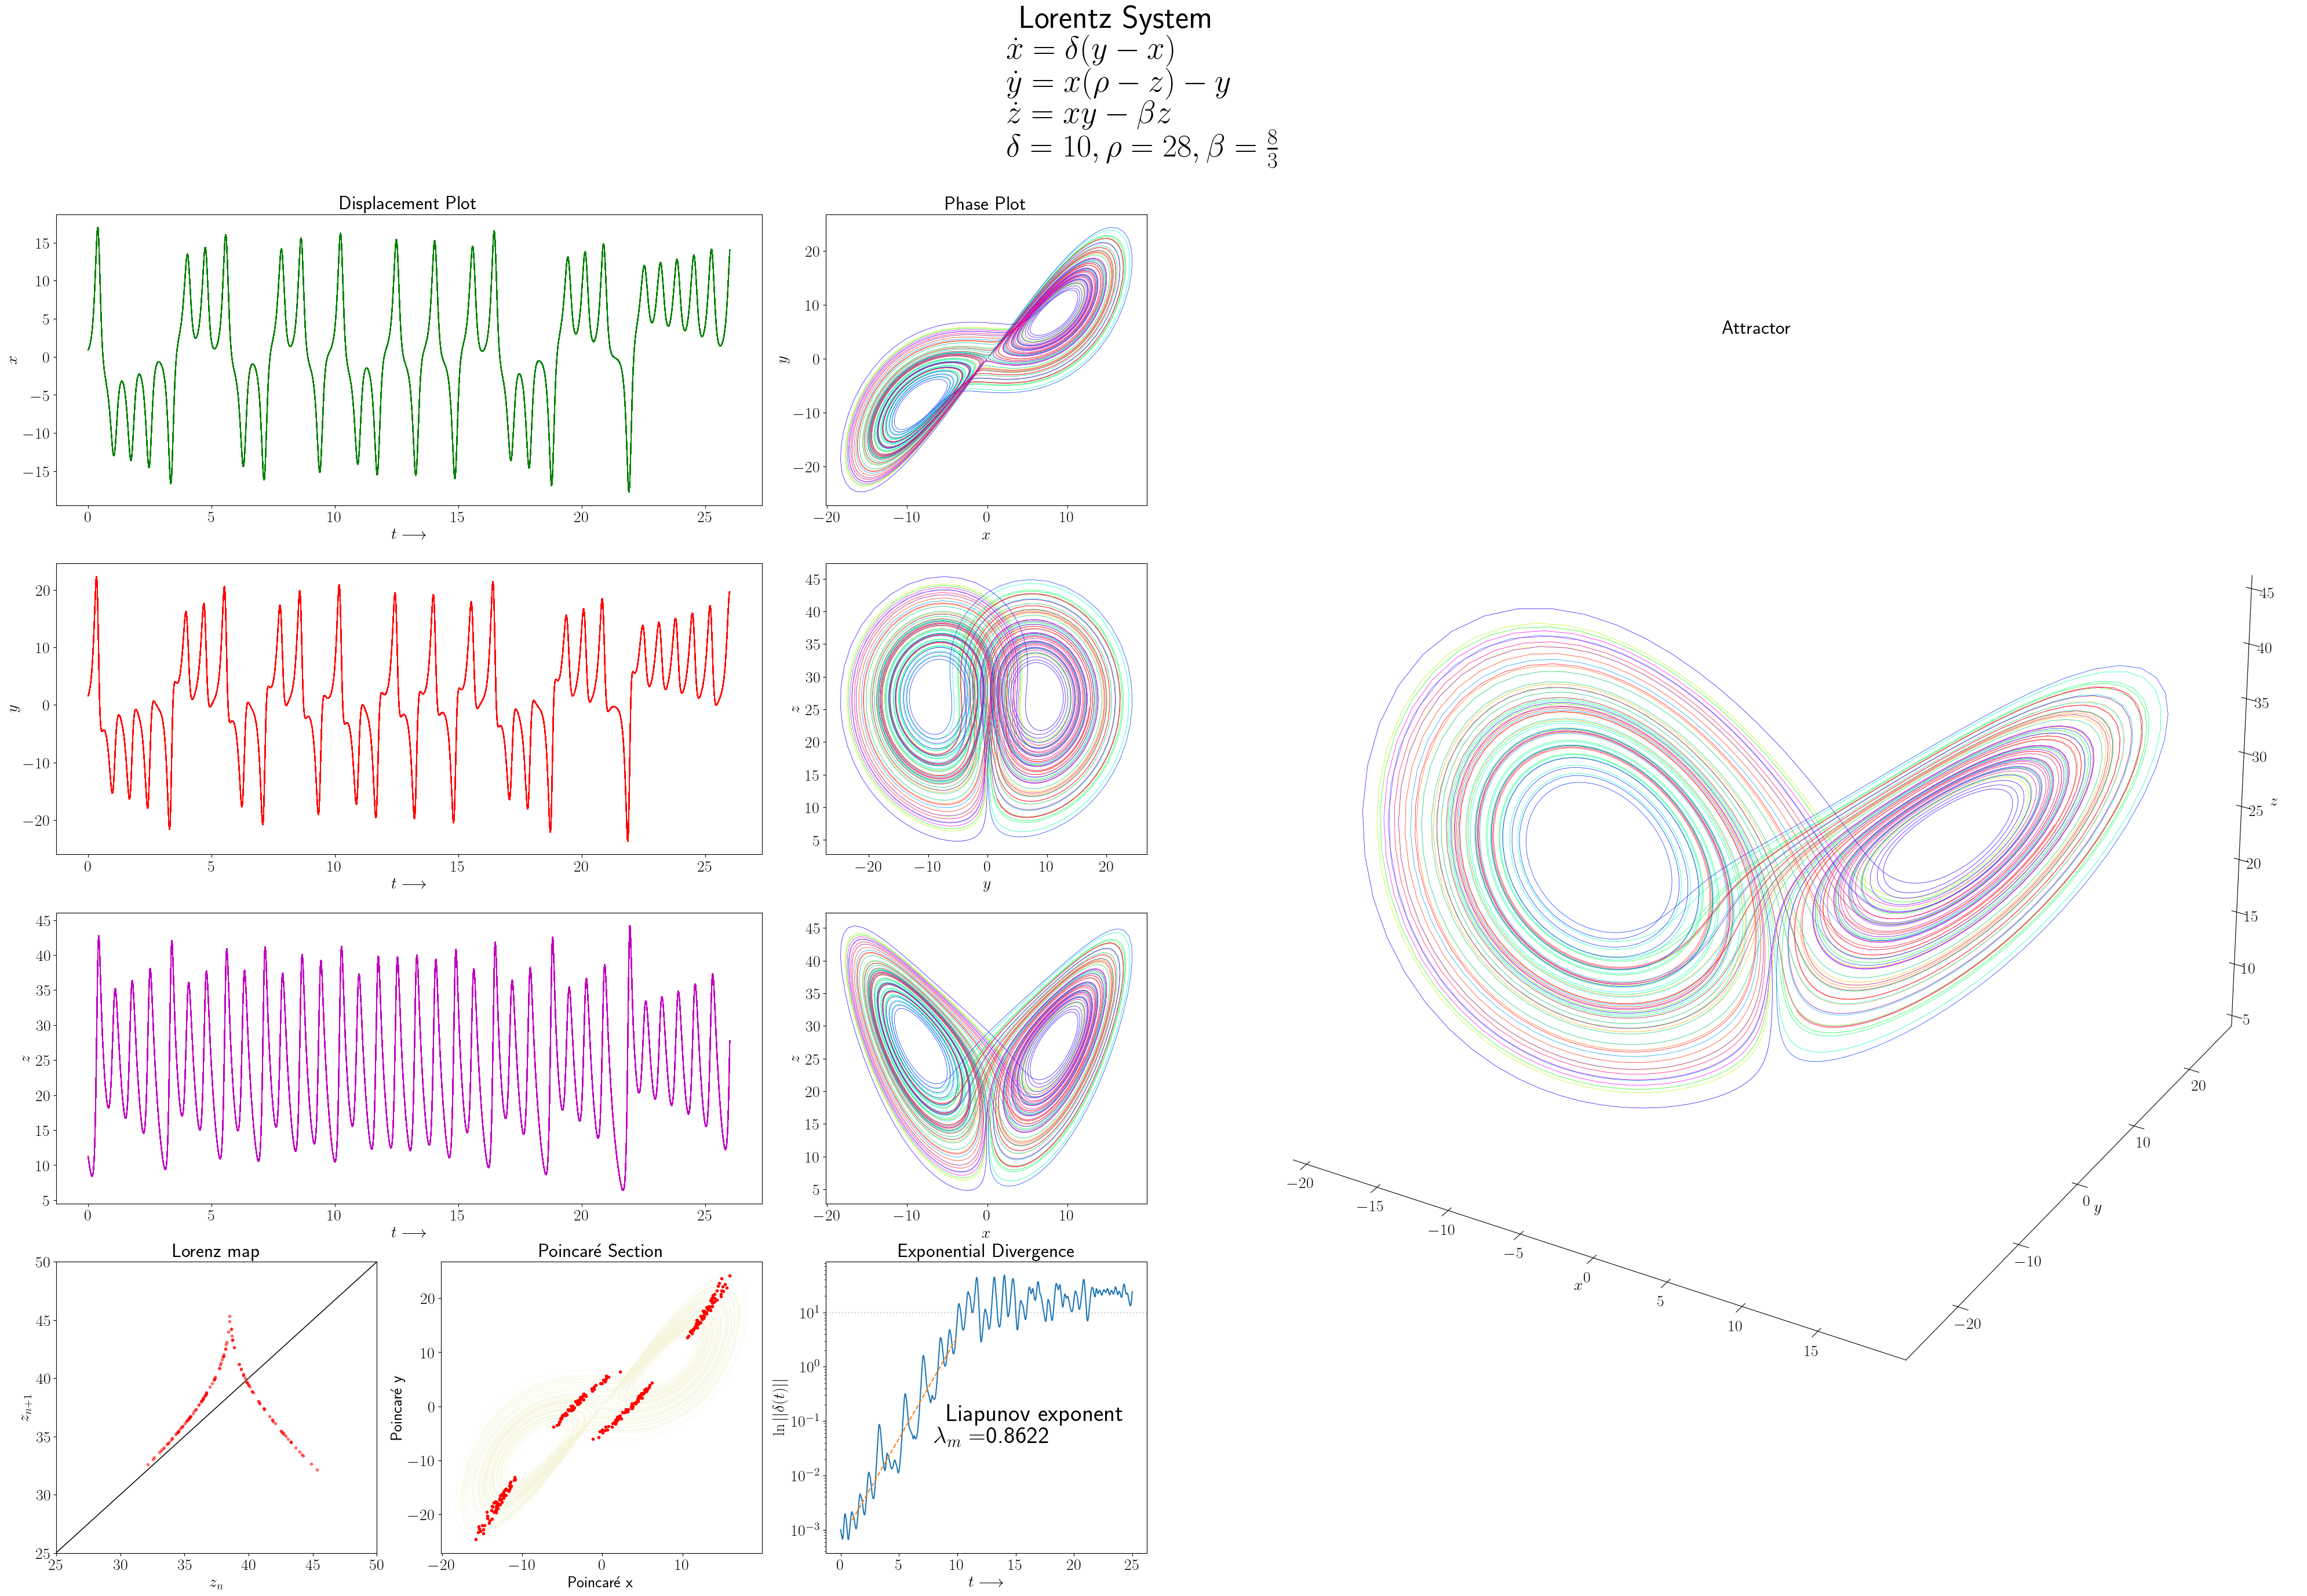

In [8]:
dt = 0.01
t_span = [0, 100]

sigma = 10
r = 28
b = 8/3
const = sigma, b, r

init_main = [0.8961, 1.5605, 11.246]
t, M = RK4(Lf, t_span, const, dt, init_main)
xx, yy, zz = M[:, 0], M[:, 1], M[:, 2]

init_perturbed = [0.8961, 1.5605, 11.247]  # Perturb z by 0.001
t_p, M_p = RK4(Lf, t_span, const, dt, init_perturbed)
xx_p, yy_p, zz_p = M_p[:, 0], M_p[:, 1], M_p[:, 2]

D = np.sqrt((xx - xx_p)**2 + (yy - yy_p)**2 + (zz - zz_p)**2)  # Divergence of Nearby Trajectories

fig = plt.figure(figsize=(50,30))
fig.suptitle('Lorentz System'
             + r'$ \\ \dot{x}= \delta(y-x)  \\ \dot{y}= x(\rho-z)-y \\ \dot{z}=xy-{\beta z} \\ $'
             + r'$ \delta = 10, \rho = 28, \beta = \frac{8}{3} $',  fontsize=40,y=1.)

gs=fig.add_gridspec(4,6)
ax1=fig.add_subplot(gs[0,0:2])
ax2=fig.add_subplot(gs[1,0:2])
ax3=fig.add_subplot(gs[2,0:2])
ax4=fig.add_subplot(gs[0,2])
ax5=fig.add_subplot(gs[1,2])
ax6=fig.add_subplot(gs[2,2])
ax7=fig.add_subplot(gs[0:4,3:6], projection='3d')
ax8=fig.add_subplot(gs[3,0])
ax9=fig.add_subplot(gs[3,1])
ax10=fig.add_subplot(gs[3,2])

ax1.set_xlabel(r'$t \longrightarrow$')
ax1.set_ylabel(r'$x$')
ax2.set_xlabel(r'$t \longrightarrow$')
ax2.set_ylabel(r'$y$')
ax3.set_xlabel(r'$t \longrightarrow$')
ax3.set_ylabel(r'$z$')
ax4.set_xlabel(r'$x$')
ax4.set_ylabel(r'$y$')
ax5.set_xlabel(r'$y$')
ax5.set_ylabel(r'$z$')
ax6.set_xlabel(r'$x$')
ax6.set_ylabel(r'$z$')
ax7.xaxis.set_pane_color((1,1,1,1))
ax7.yaxis.set_pane_color((1,1,1,1))
ax7.zaxis.set_pane_color((1,1,1,1))
ax7.xaxis.pane.set_edgecolor('w')
ax7.yaxis.pane.set_edgecolor('w')
ax7.zaxis.pane.set_edgecolor('w')
ax7.grid(False)
ax7.set_xlabel(r'$x$')
ax7.set_ylabel(r'$y$')
ax7.set_zlabel(r'$z$')
ax8.set_xlabel(r'$z_n$')
ax8.set_ylabel(r'$z_{n+1}$')
ax9.set_xlabel('Poincaré x')
ax9.set_ylabel('Poincaré y')
ax10.set_xlabel(r'$t \longrightarrow$')
ax10.set_ylabel(r'$ \ln ||\delta(t)||$')

s = 10
n = len(t)
for i in range(0,n-s,s):
    
    # 1D Displacement plot
    ax1.plot(t[:int(26/dt)],xx[:int(26/dt)],'g', linewidth=1.1)
    #ax1.plot(t[:int(26/dt)],xx_p[:int(26/dt)],'m--', linewidth=0.5)
    ax2.plot(t[:int(26/dt)],yy[:int(26/dt)],'r', linewidth=1.1)
    #ax2.plot(t[:int(26/dt)],yy_p[:int(26/dt)],'m--', linewidth=0.5)
    ax3.plot(t[:int(26/dt)],zz[:int(26/dt)],'m', linewidth=1.1)
    #ax3.plot(t[:int(26/dt)],zz_p[:int(26/dt)],'m--', linewidth=0.5)
    
    # 2D Phase Plot
    ax4.plot(xx[i:i+s+1], yy[i:i+s+1], color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax5.plot(yy[i:i+s+1], zz[i:i+s+1], color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax6.plot(xx[i:i+s+1], zz[i:i+s+1], color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    
    # 3D Attractor
    ax7.plot(xx[i:i+s+1], yy[i:i+s+1], zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    
ax1.set_title('Displacement Plot')
ax4.set_title('Phase Plot')
ax7.set_title('Attractor')

# Lorenz Map
z_n = FindMaxima(zz)    
#ax8.plot(z_n[0:-1], z_n[0:-1], 'k--')
ax8.axline([0, 0], [1, 1], color = 'black', linestyle = '-', linewidth = 1.1)
ax8.plot(z_n[1:-2], z_n[2:-1], 'r.', alpha=0.5)
ax8.set_xlim([25,50])
ax8.set_ylim([25,50])
ax8.set_title('Lorenz map')

# Poincaré Section of Lorenz Attractor
poincare_x, poincare_y  = generate_poincare_section(xx, yy, zz, t, r)
ax9.plot(xx, yy, color='beige', linewidth=0.4)
ax9.plot(poincare_x, poincare_y, 'r.')
ax9.set_title('Poincaré Section')

# Exponential Divergence 
ax10.axhline(y=10**1, color="lightgray", linestyle=":")
ax10.semilogy(t[:int(25/dt)],D[:int(25/dt)])
# Liapunov exponent from Exponential Divergence
m,c = fit(t[int(1/dt):int(10/dt)], np.log(D[int(1/dt):int(10/dt)]))
Y = np.exp(m * t[int(1/dt):int(10/dt)] + c)
ax10.plot(t[int(1/dt):int(10/dt)], Y, '--')
ax10.text(8,10**(-1),'Liapunov exponent'+r'$ \\ \lambda_m=${:.4} '.format(m), fontsize=30)
ax10.set_title('Exponential Divergence')

#plt.savefig('Lorenz_Attractor',dpi=100)
plt.show()

In [12]:
1/0.003

333.3333333333333

Tent map,as model of Lorenz map                                                                                                         
Consider the map                                                                                                                      
$\qquad\begin{equation*}x_{n+1} = \left\{\begin{array}{rl}2x_n & \text{if } 0\le x_n \le\frac{1}{2},\\ 2-2x_n & \text{if } \frac{1}{2}\le x_n \le 1.\end{array} \right.\end{equation*}$                                                                                                                          
as a simple analytical model of the Lorenz map.                                                                                        
1. Why is it called the “tent map”?                                                                                                                                                                                
2. Find all the fixed points, and classify their stability.                                                                                        
3. Show that the map has a period-2 orbit. Is it stable or unstable?                                                                                        
4. Can you find any period-3 points?                                                                                         
How about period-4? If so, are the corresponding periodic orbits stable or unstable?

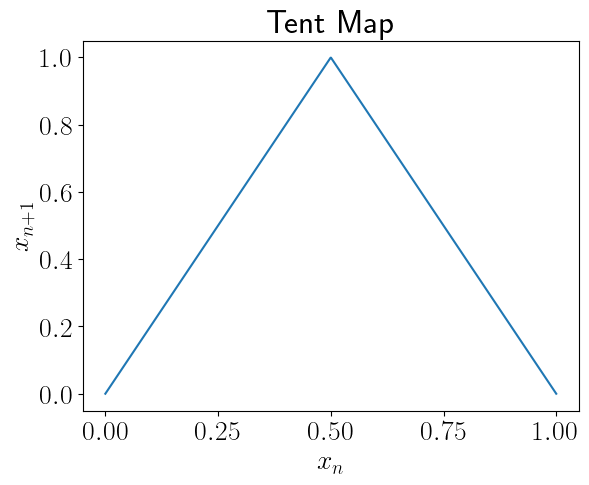

In [60]:
def x_next(x_n, r):
    if 0 <= x_n <= 0.5:
        return r * x_n
    elif 0.5 <= x_n <= 1:
        return r*(1 - x_n)
    else:
        return None  

r = 2    
x_values = np.linspace(0, 1, 1000)
x_next_values = [x_next(x, r) for x in x_values]

plt.plot(x_values, x_next_values)
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1}$')
plt.title('Tent Map')
plt.show()

1. The "tent map" is named because its graphical representation resembles a tent shape.                                         
It is a one-dimensional discrete-time dynamical system defined by a piecewise linear function.

2. To find the fixed points, we need to solve the equation $x_{n+1} = x_n$ for $x_n$.                                                 
The tent map is defined as :                                                                                              
$\qquad x_{n+1} = \left\{\begin{array}{ll}2x_n & \text{if } 0 \leq x_n < \frac{1}{2} \\ 2 - 2x_n & \text{if } \frac{1}{2} \leq x_n \leq 1 \\ \end{array} \right.$                                                                                              
Setting $x_{n+1} = x_n$, we get :                                                                                              
   - For $0 \leq x_n < \frac{1}{2}, \quad 2x_n = x_n \Rightarrow x_n = 0$.                                                        
   - For $\frac{1}{2} \leq x_n \leq 1, \quad 2 - 2x_n = x_n \Rightarrow x_n = \frac{2}{3}$.                                     
So, the fixed points are $x = 0$ and $x = \frac{2}{3}$.                                                                        
To classify their stability, we can analyze the derivative of the map at these points.                                          
If $|f'(x)| < 1$, the fixed point is stable; if $|f'(x)| > 1$, it's unstable.

3. To find a period-2 orbit, we need to find $x_0$ such that $f(f(x_0)) = x_0$.                                              
We can iterate the tent map starting from different initial conditions until we find a value that satisfies this condition.        
Once we find such a value, we need to determine its stability by analyzing the behavior of nearby points under iteration.

4. Similarly, we can search for period-3 and period-4 points by finding $x_0$ such that $f(f(f(x_0))) = x_0$ and $f(f(f(f(x_0)))) = x_0$, respectively.                                                                                          
Then, we analyze their stability based on the behavior of nearby points under iteration.

For each of the values of r given below, use a computer to explore the dynamics of the Lorenz system, assuming $\sigma= 10$ and $\beta=\frac{8}{3}$ as usual.                                                                      
In each case, plot $x(t), y(t),$ and $x$ vs. $z$.                                                                          
You should investigate the consequences of choosing different initial conditions and lengths of integration.             
Also, in some cases you may want to ignore the transient behavior, and plot only the sustained long-term behavior.                                                                              
9.3.2 $r= 10$                                                                                                                       
9.3.3 $r= 22$ (transient chaos)                                                                                                        
9.3.4 $r= 24.5$ (chaos and stable point co-exist)                                                                                  
9.3.5 $r= 100$ (surprise)                                                                                                       
9.3.6 $r= 126.52$                                                                                                                    
9.3.7 $r= 400$

9.5 Exploring Parameter Space (Numerical experiments)                                                                    
For each of the values of r given below, use a computer to explore the dynamics of the Lorenz system,                  
assuming $\sigma= 10$ and $\beta=\frac{8}{3}$ as usual. In each case, plot $x ( t ), y ( t ),$ and $x$ vs. $z.$                    
9.5.1 $r = 166.3$ (intermittent chaos)                                                                                           
9.5.2 $r = 212$ (noisy periodicity)                                                                                          
9.5.3 the interval $145 < r < 166$ (period-doubling)

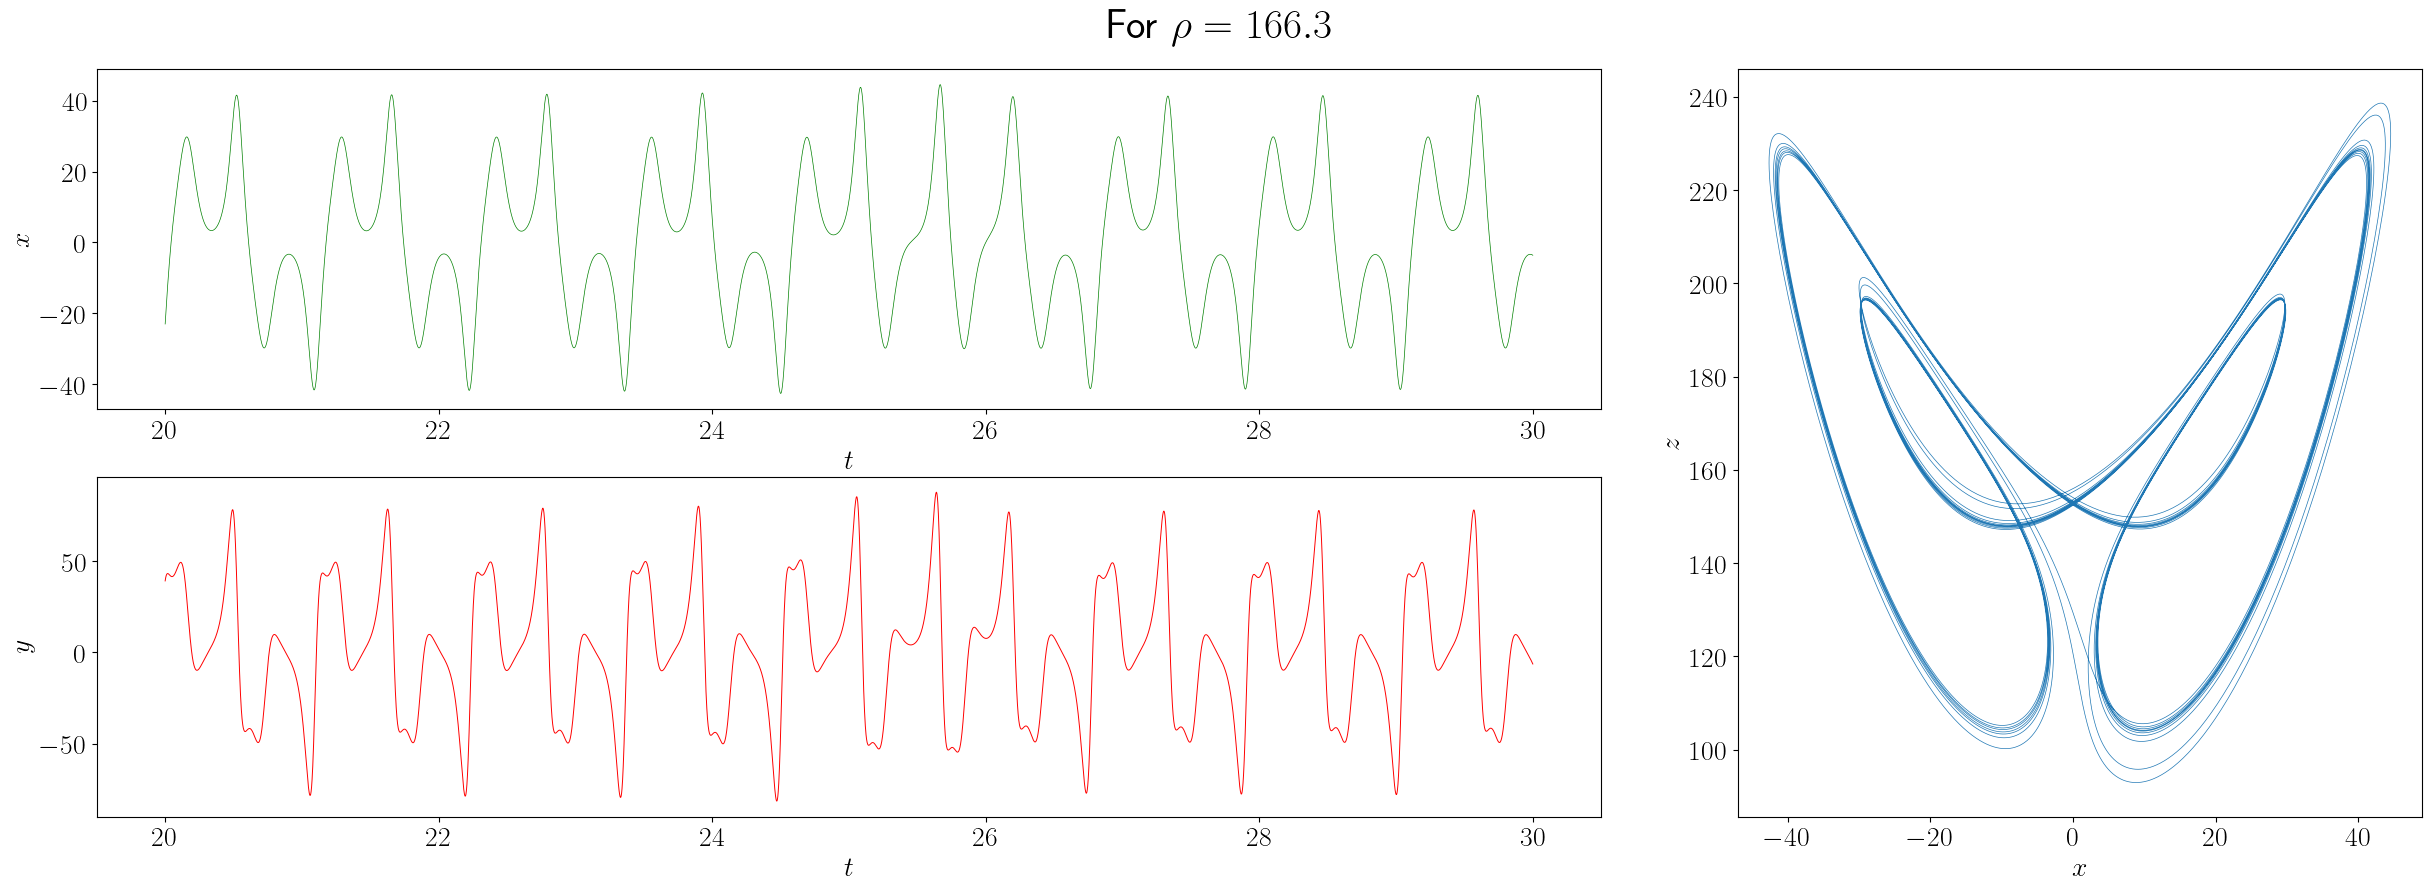

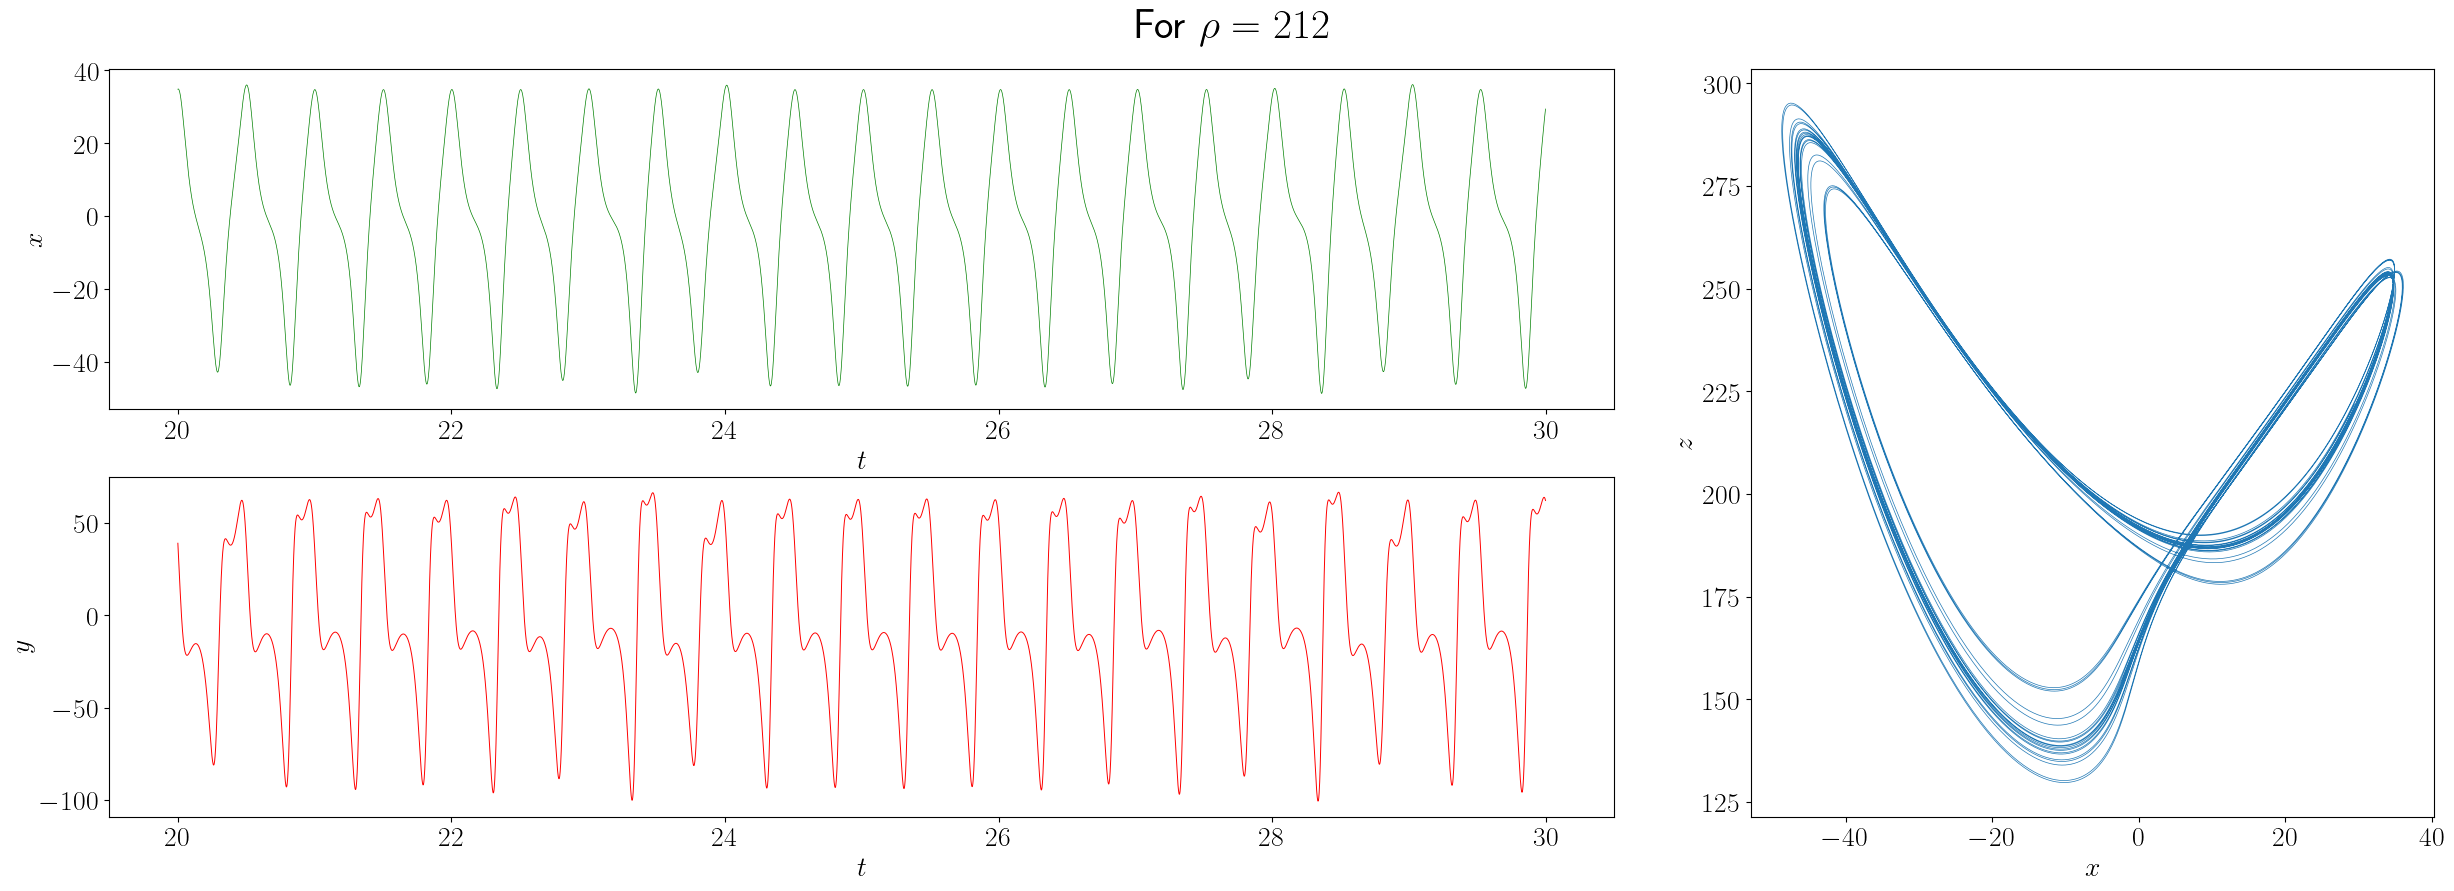

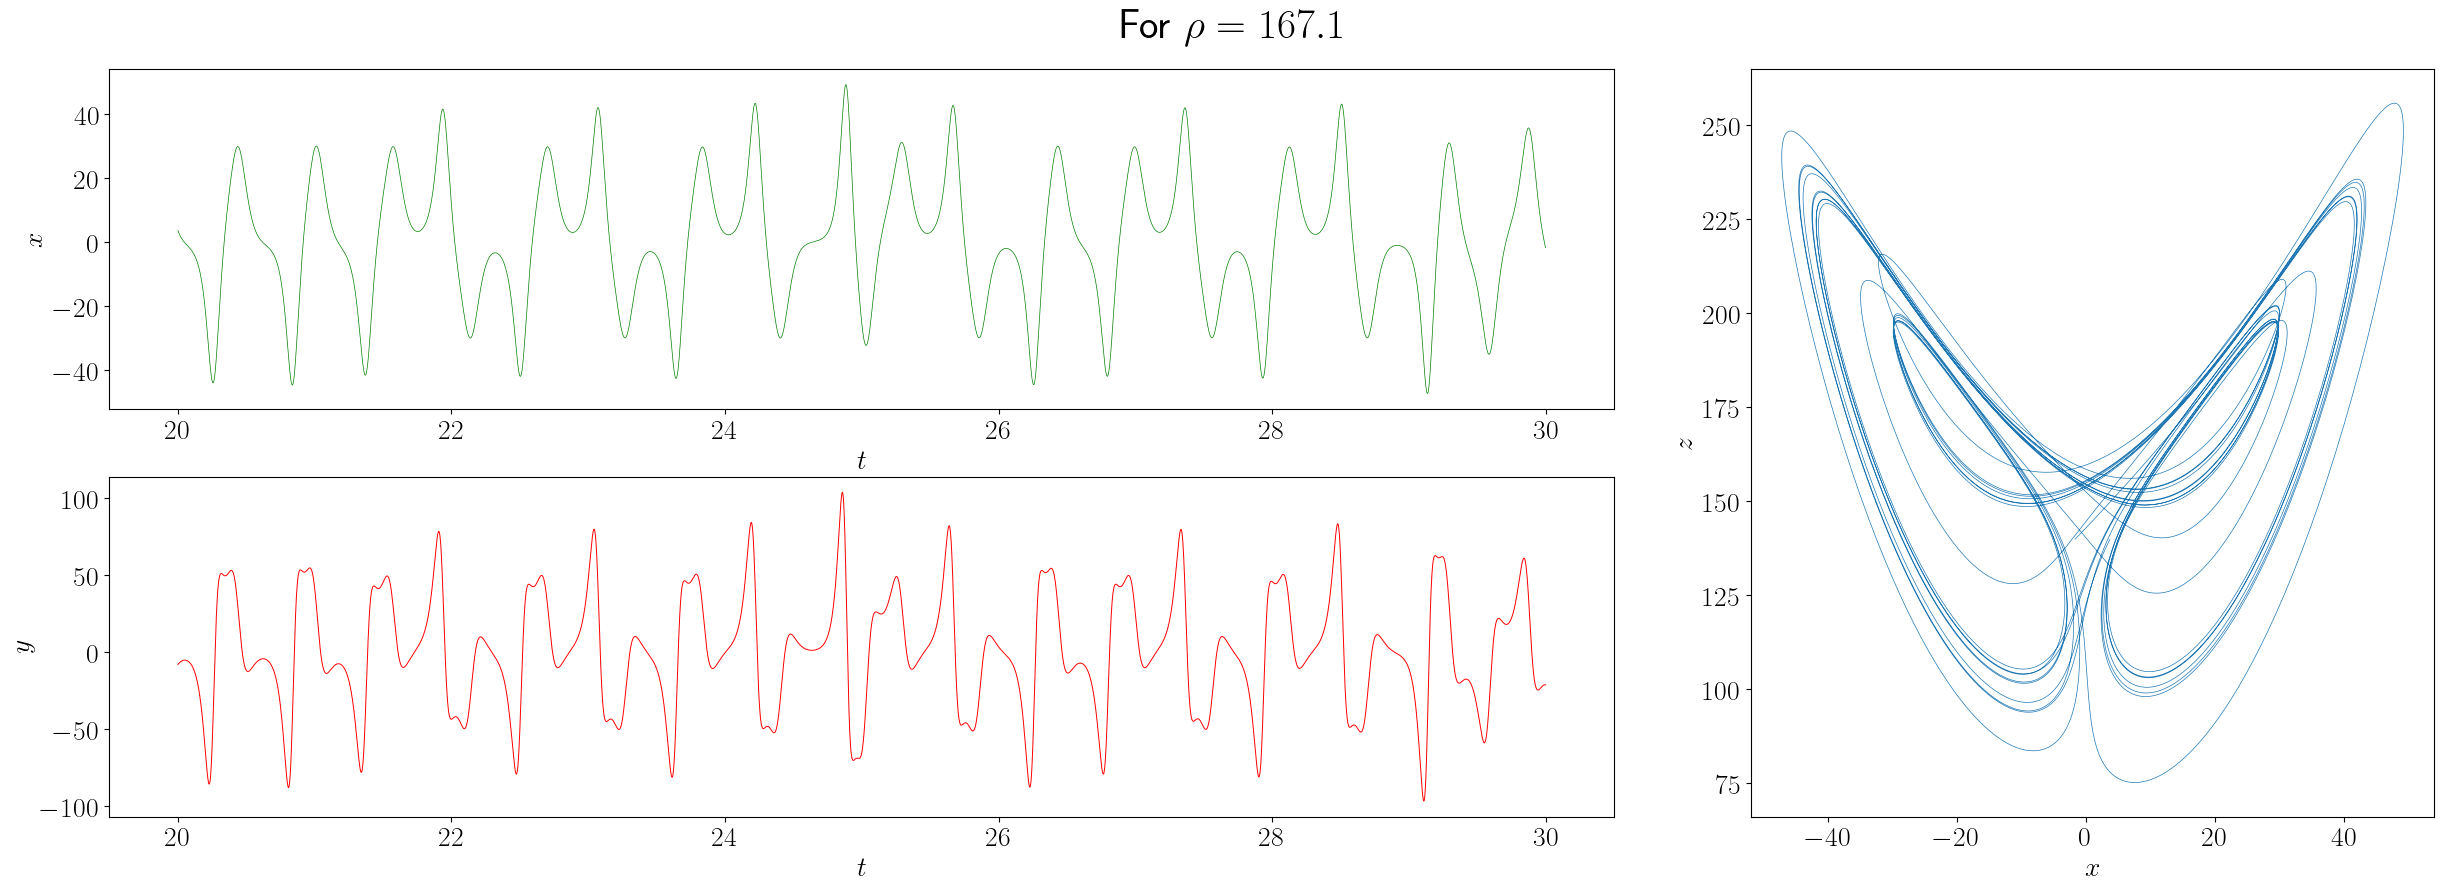

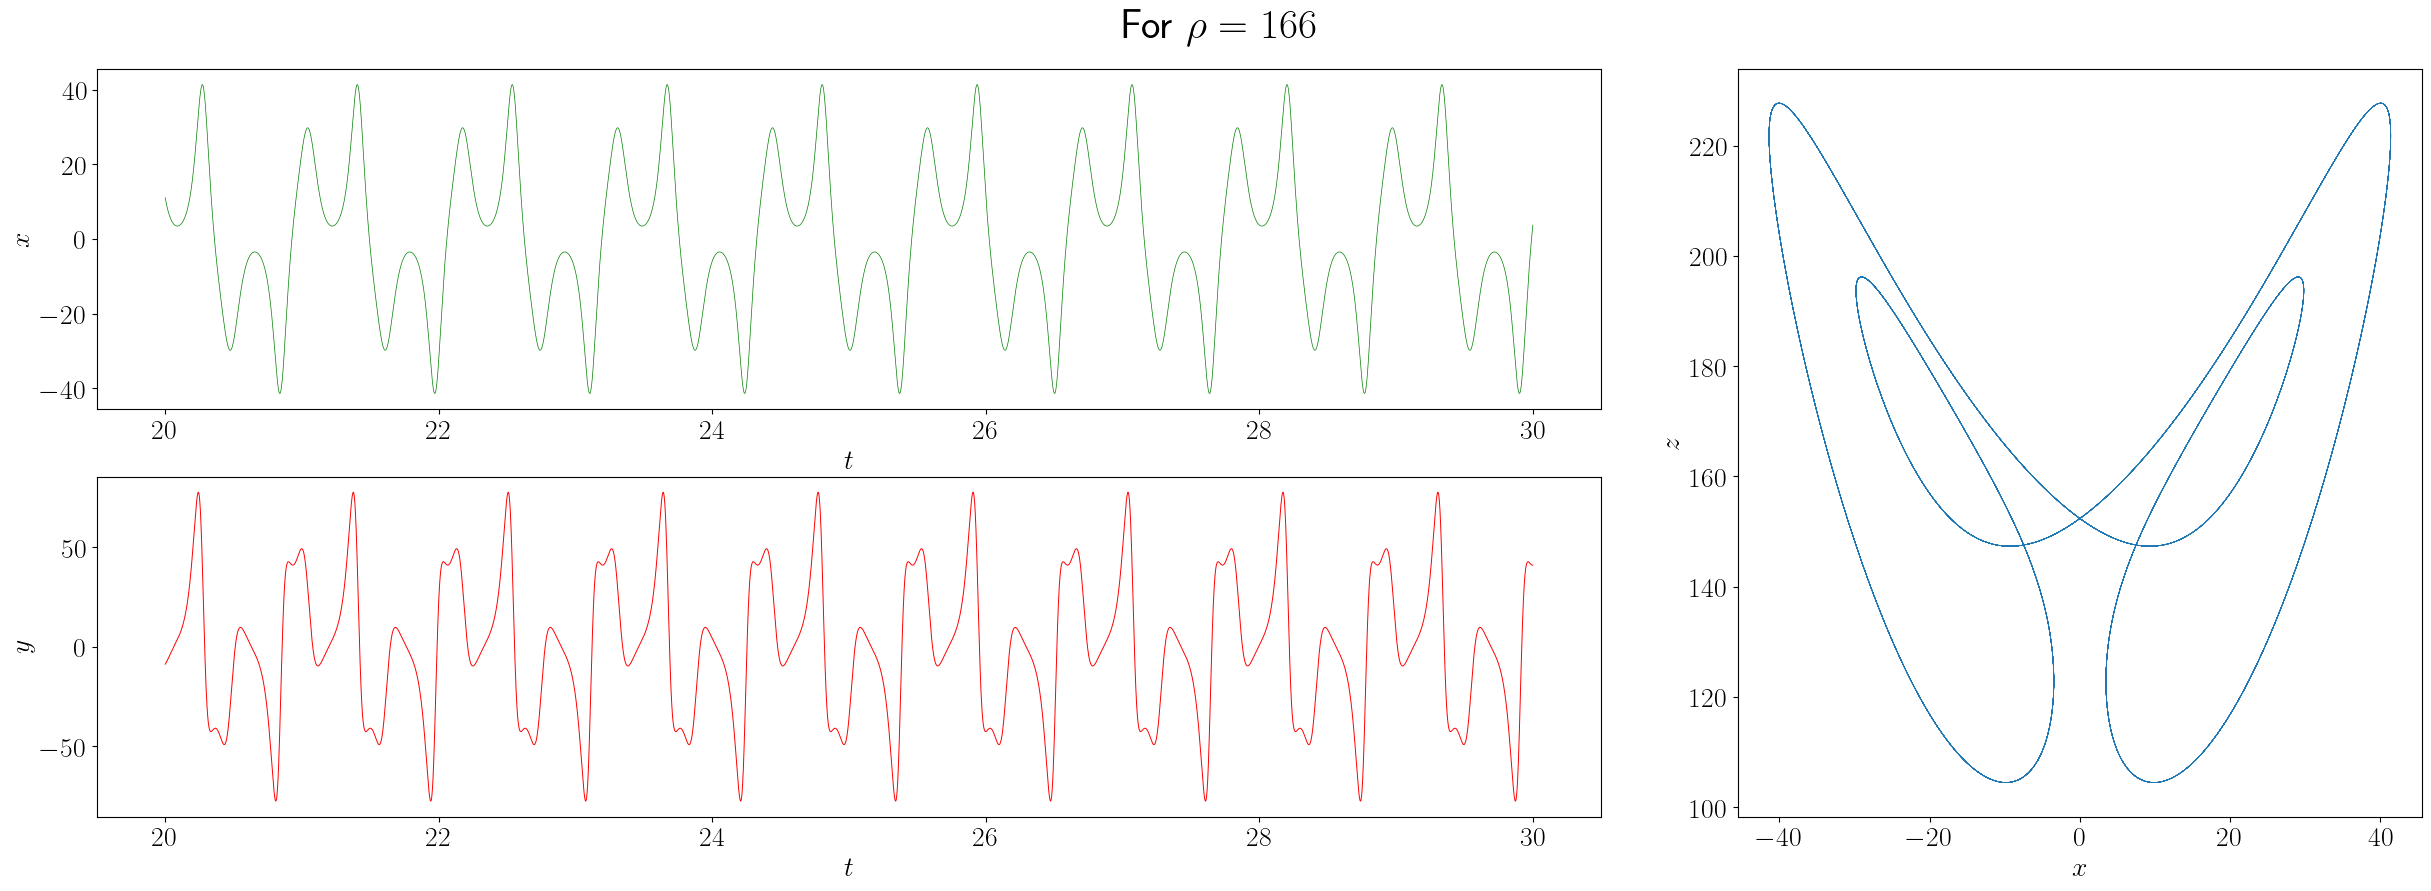

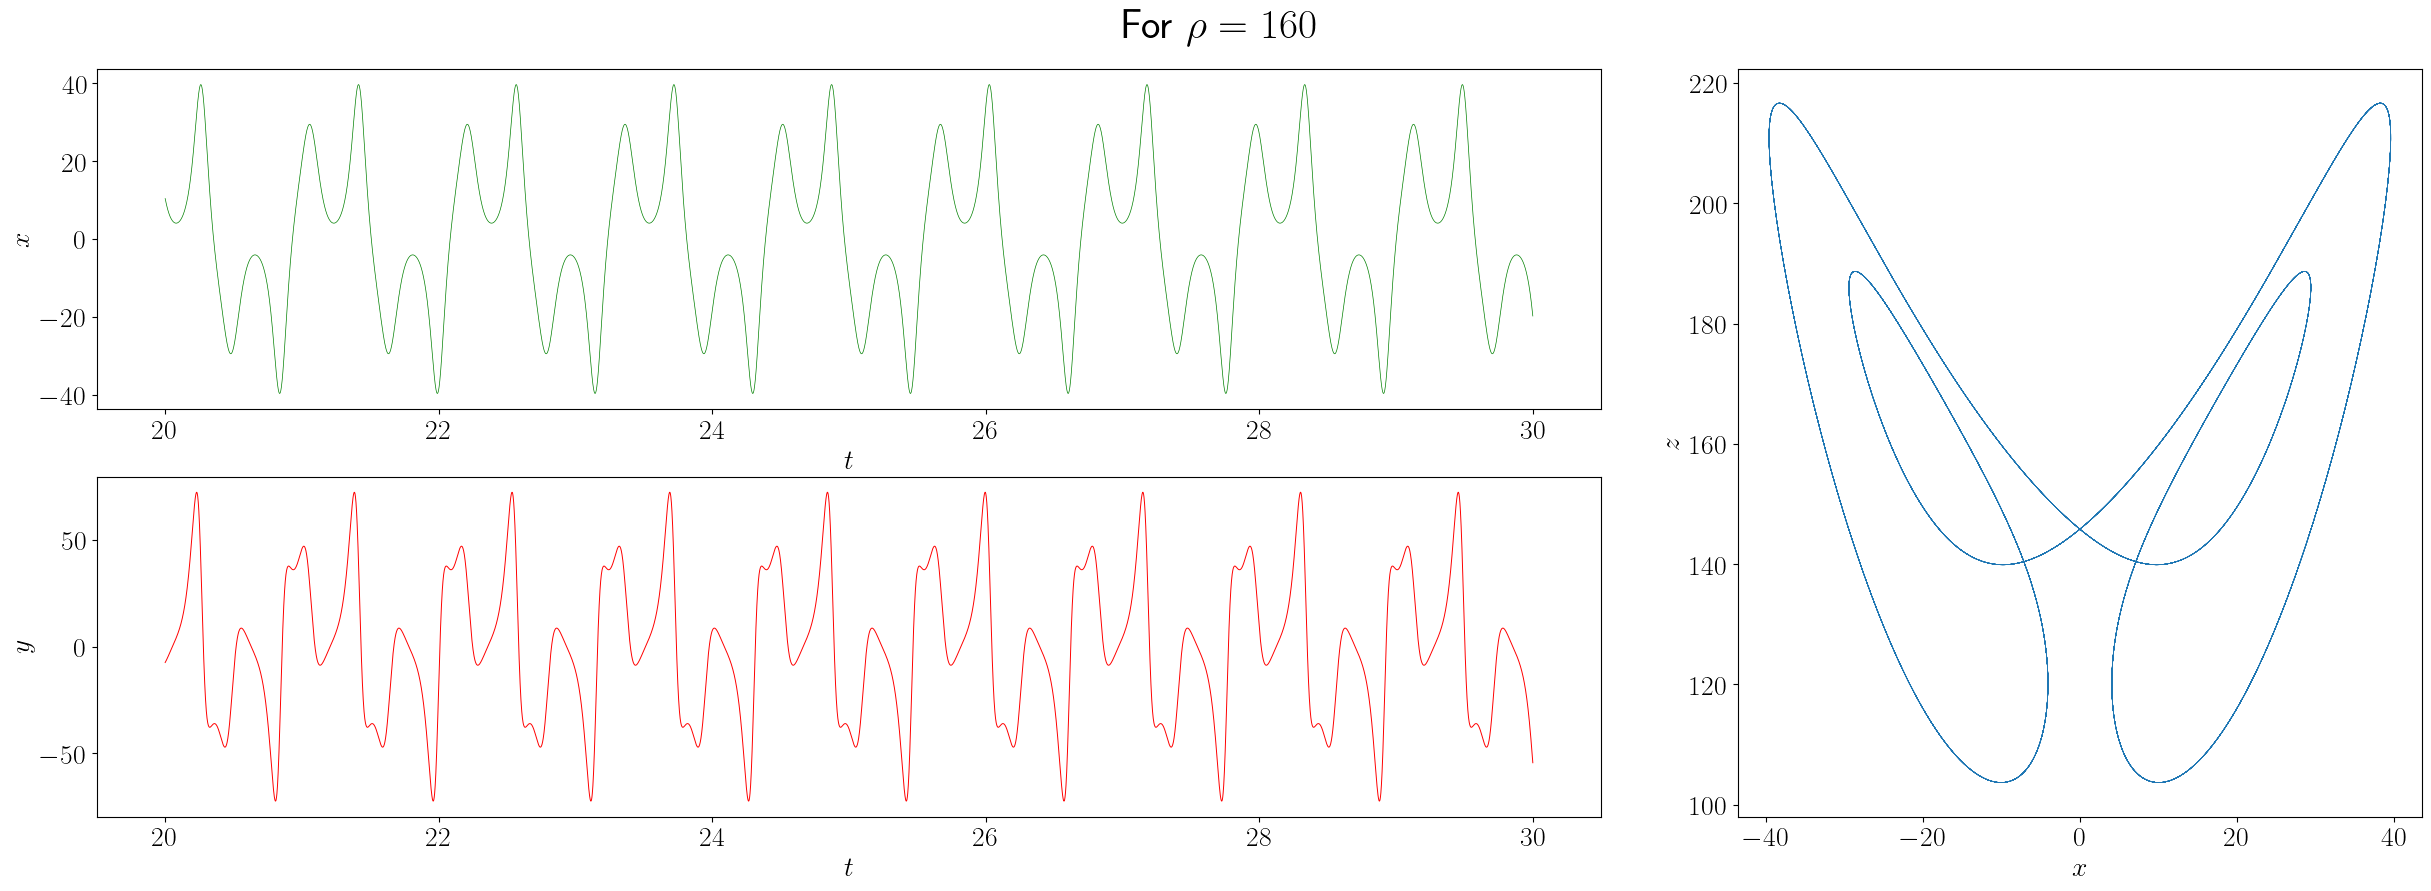

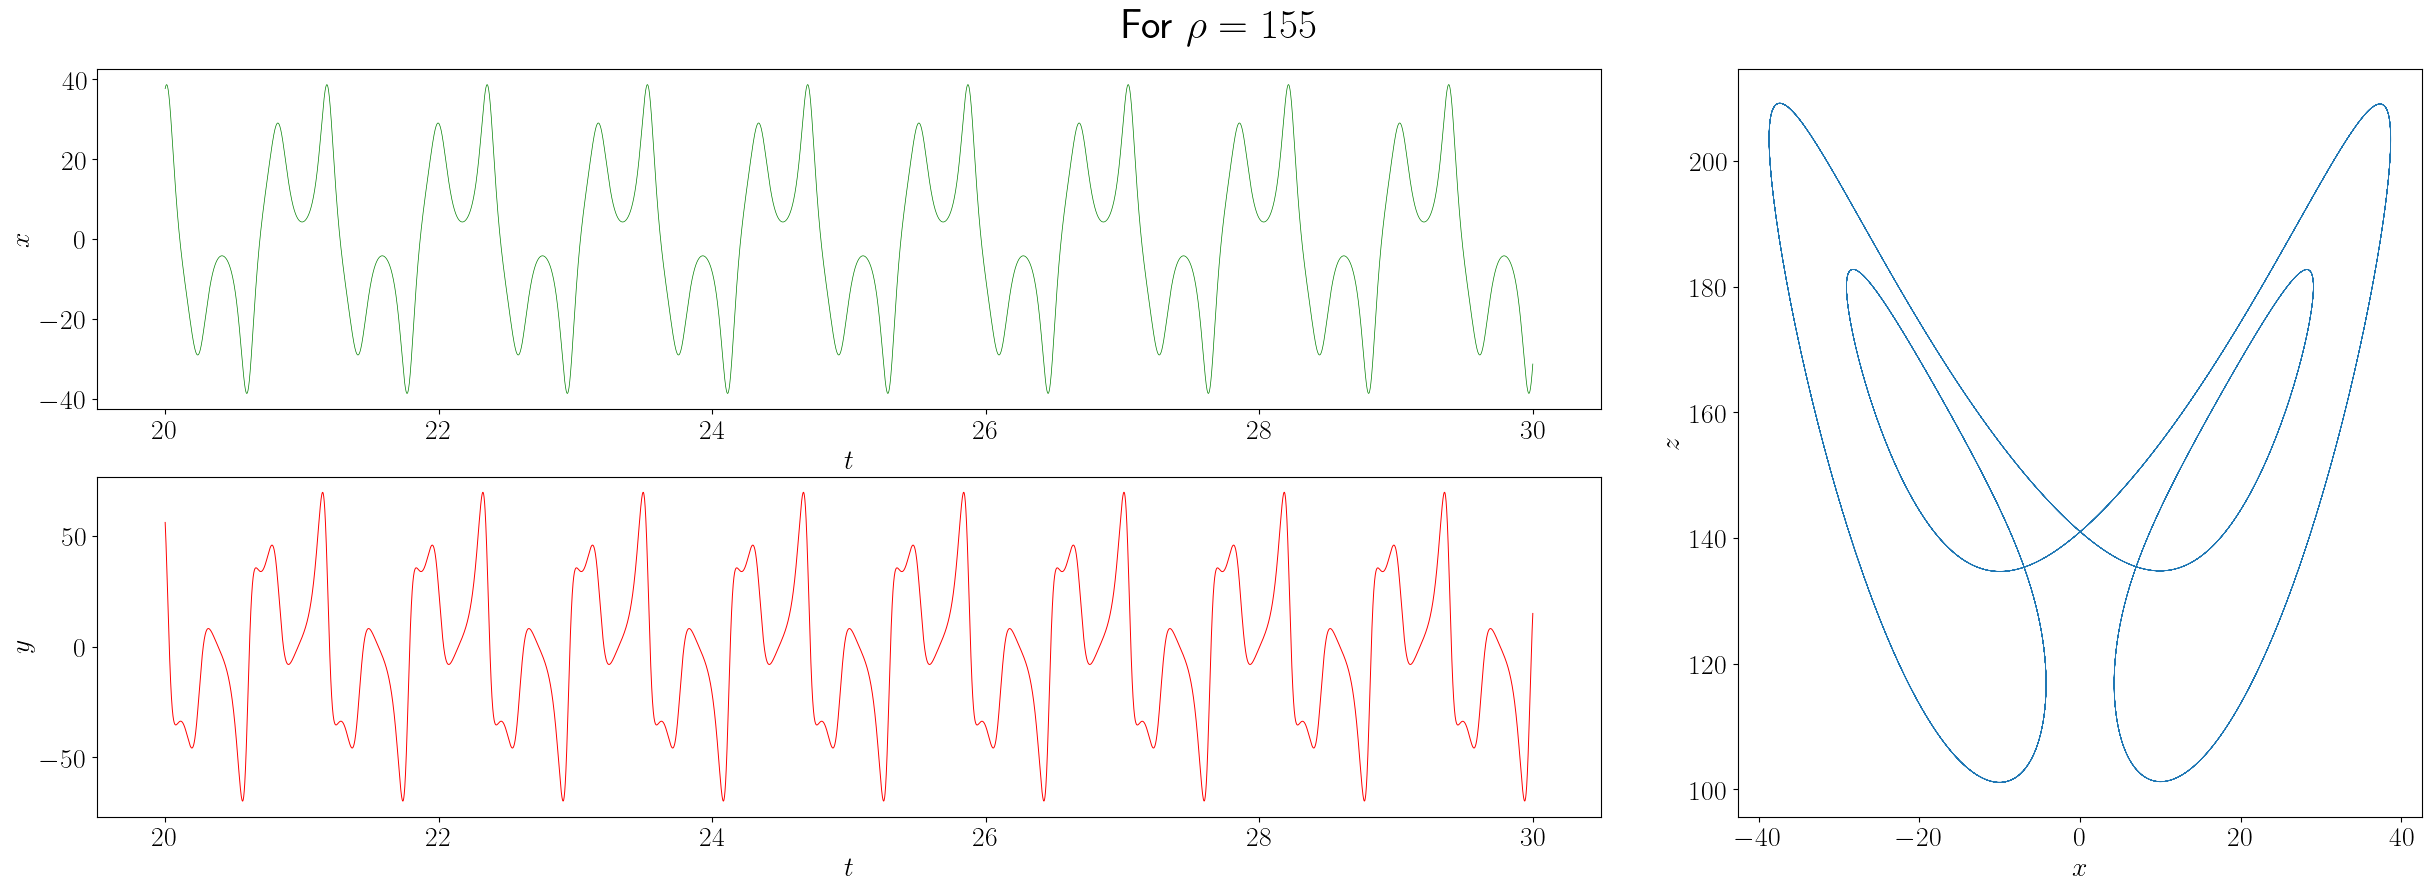

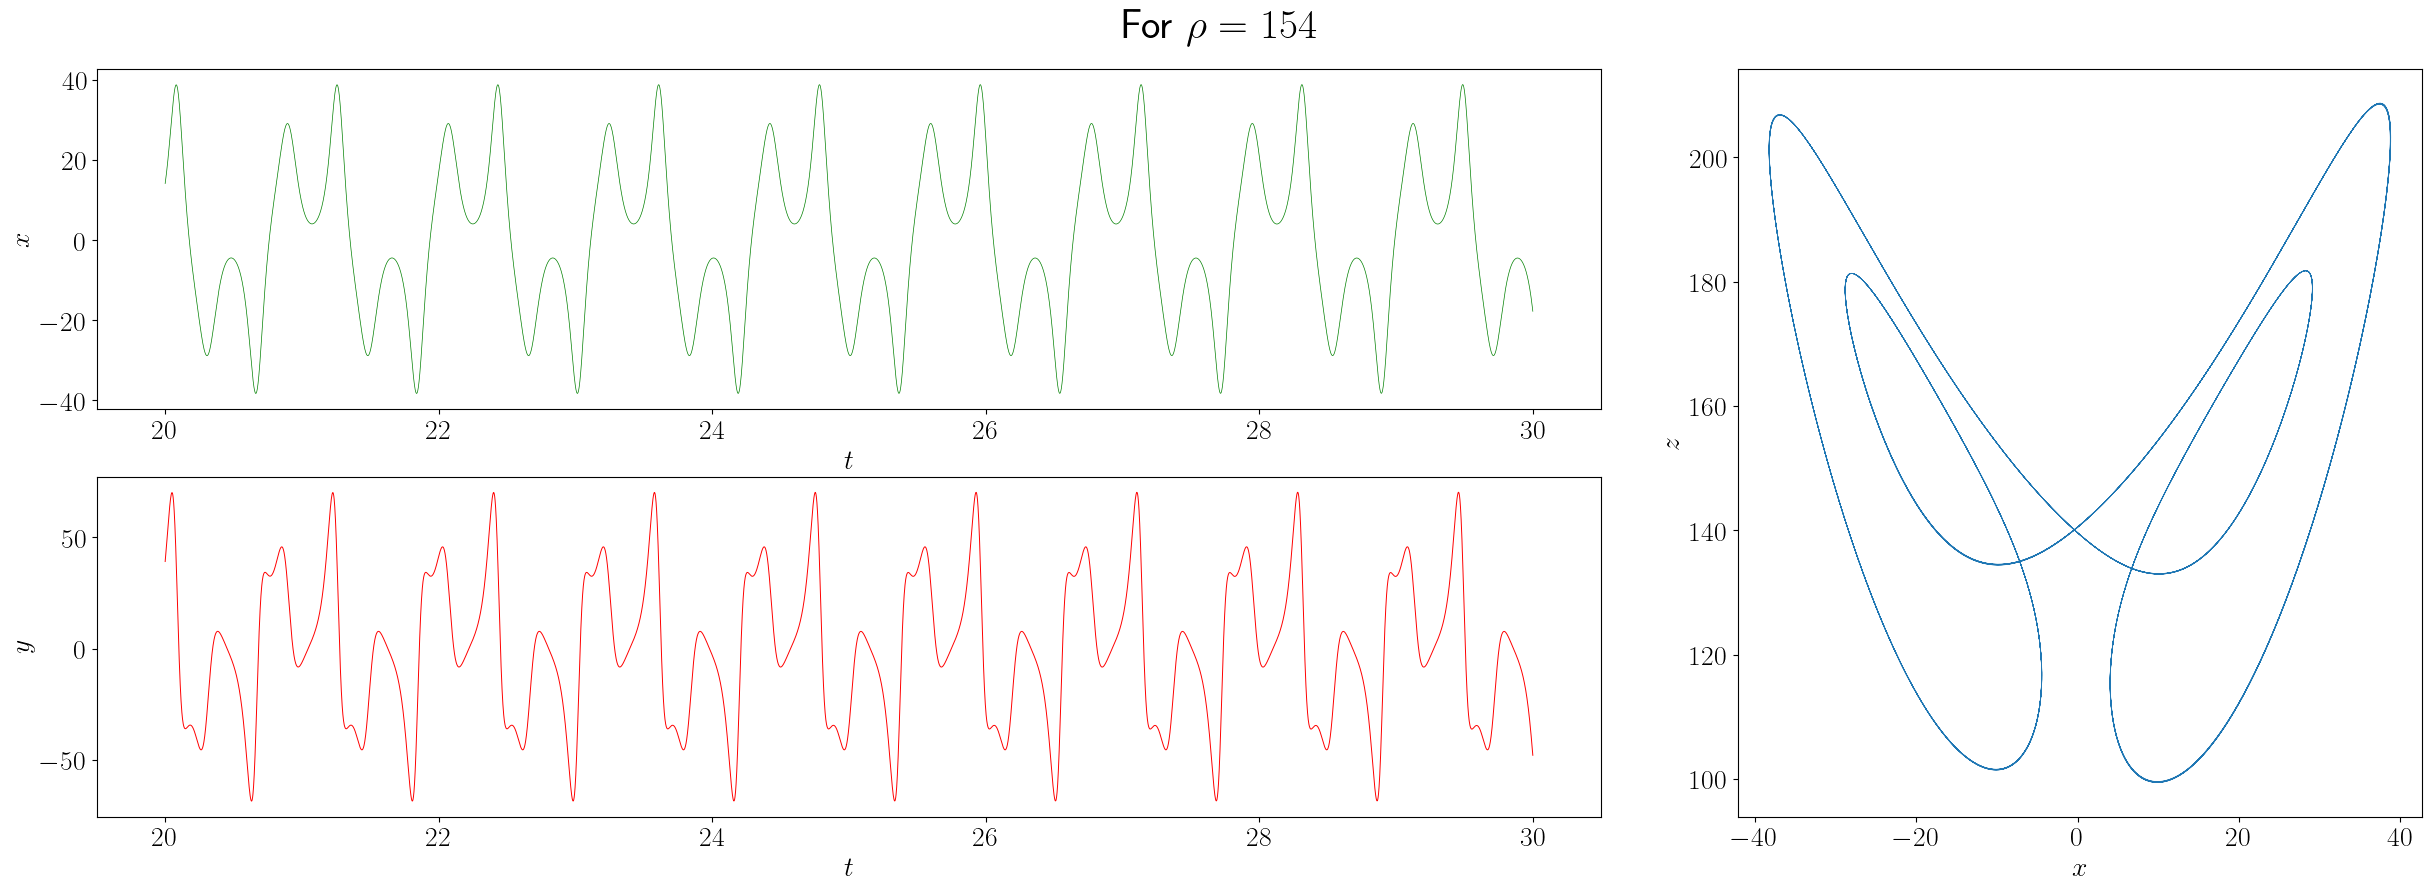

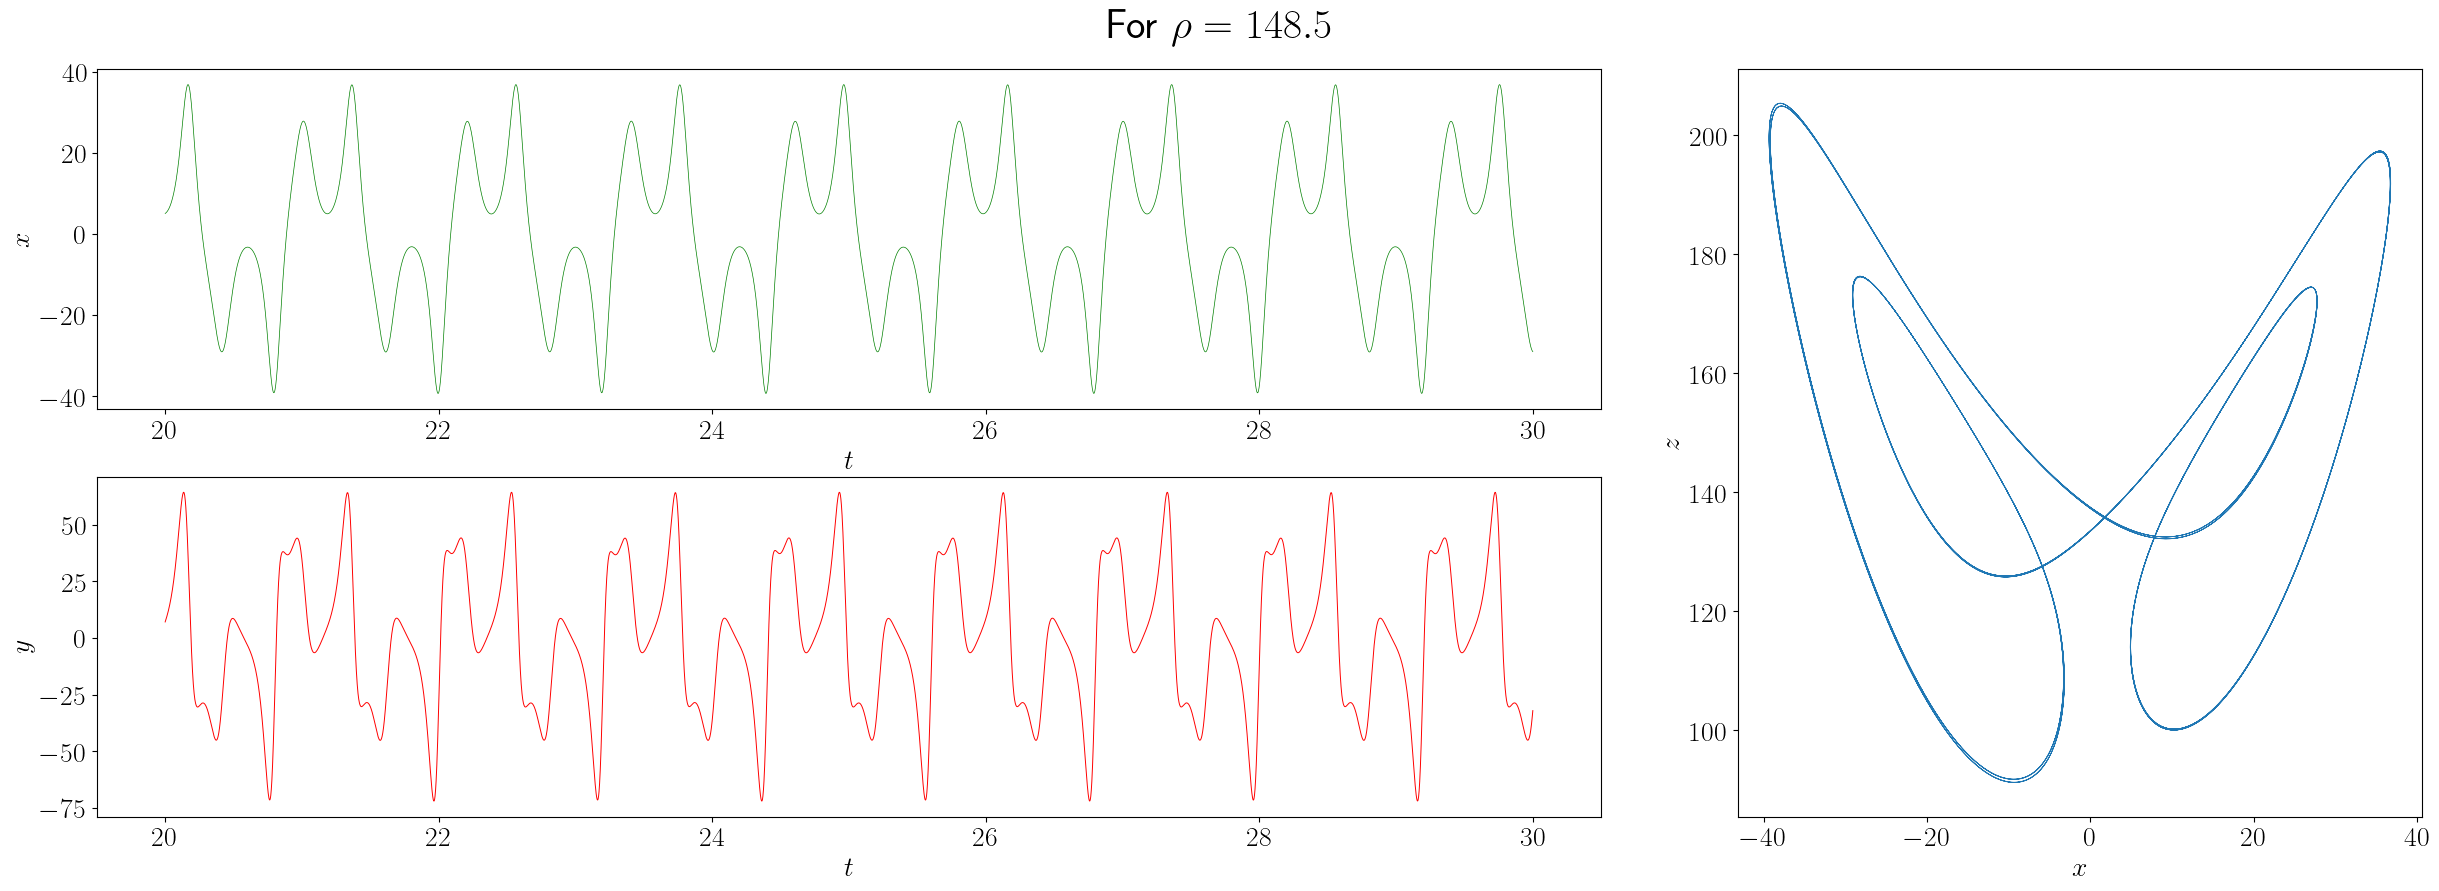

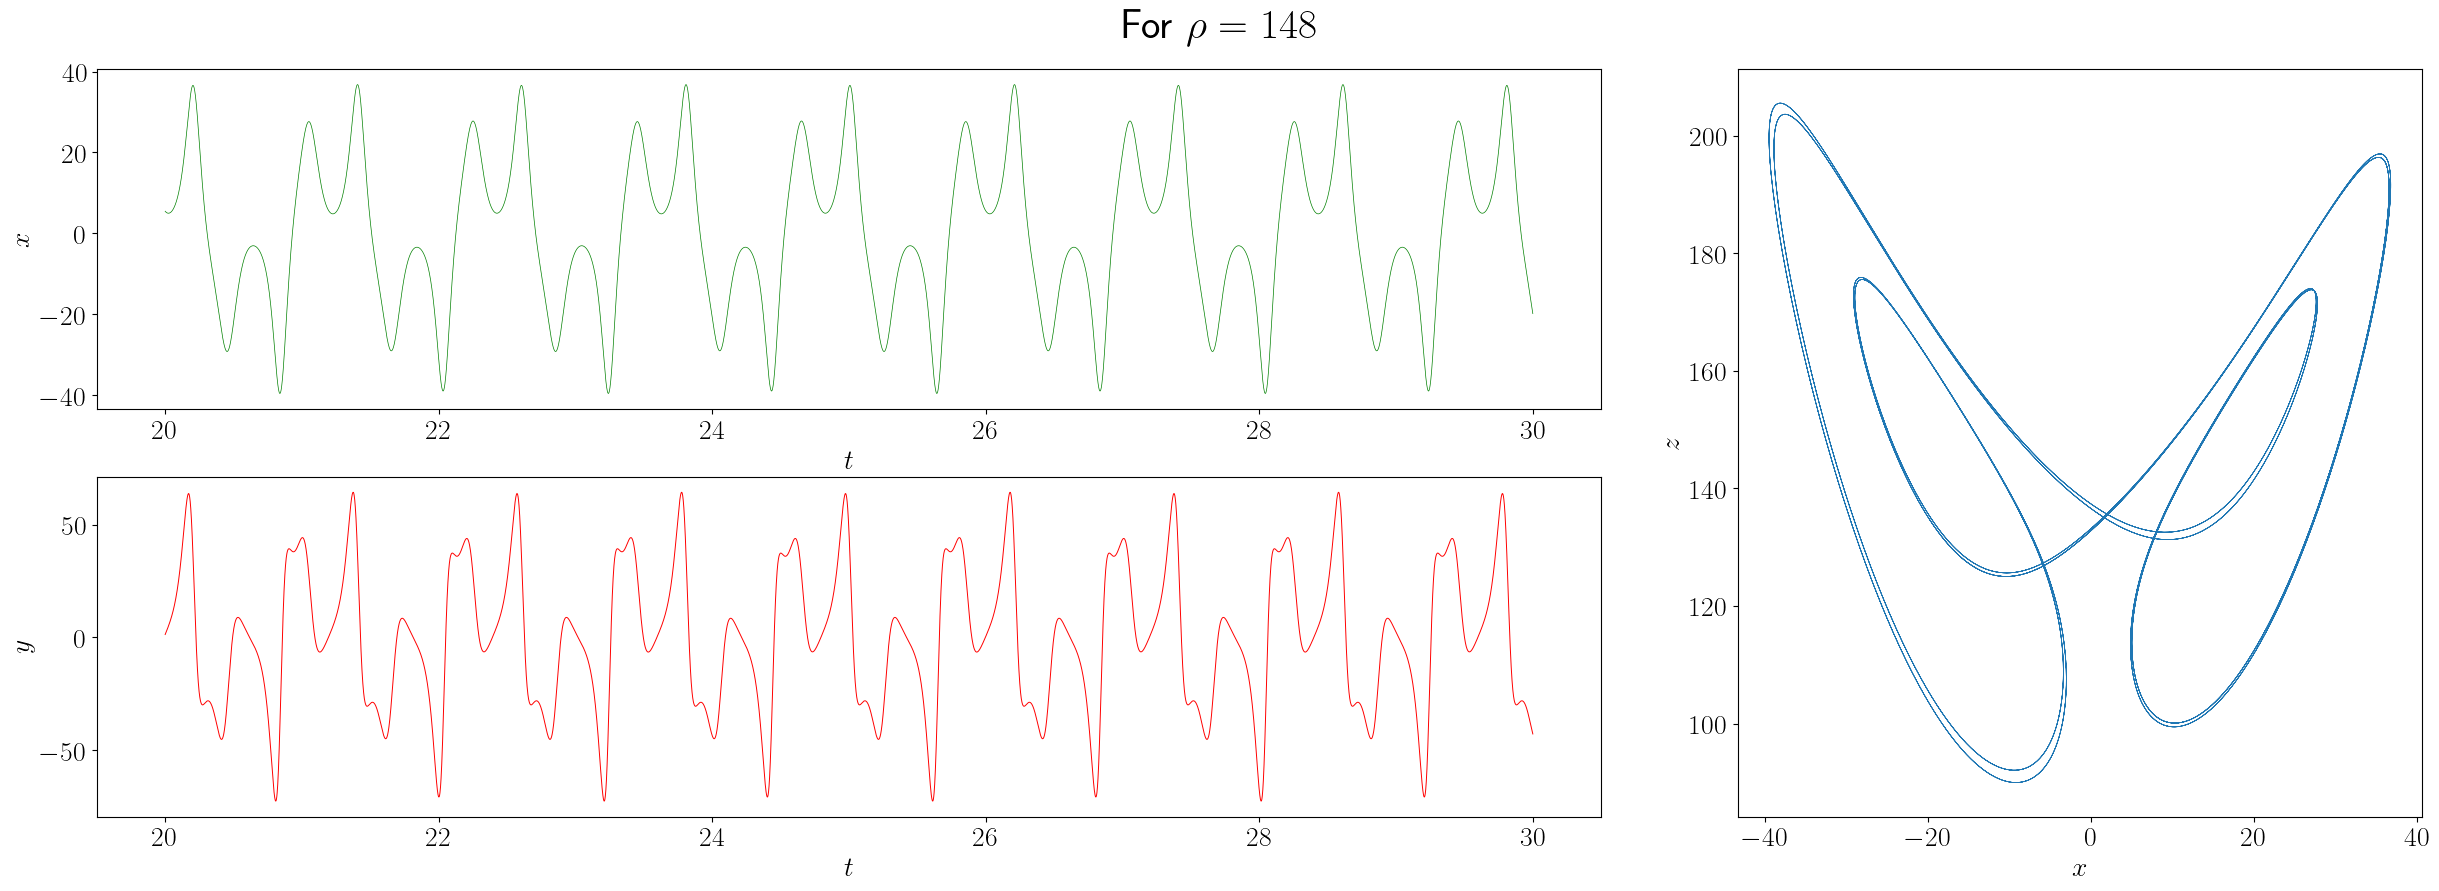

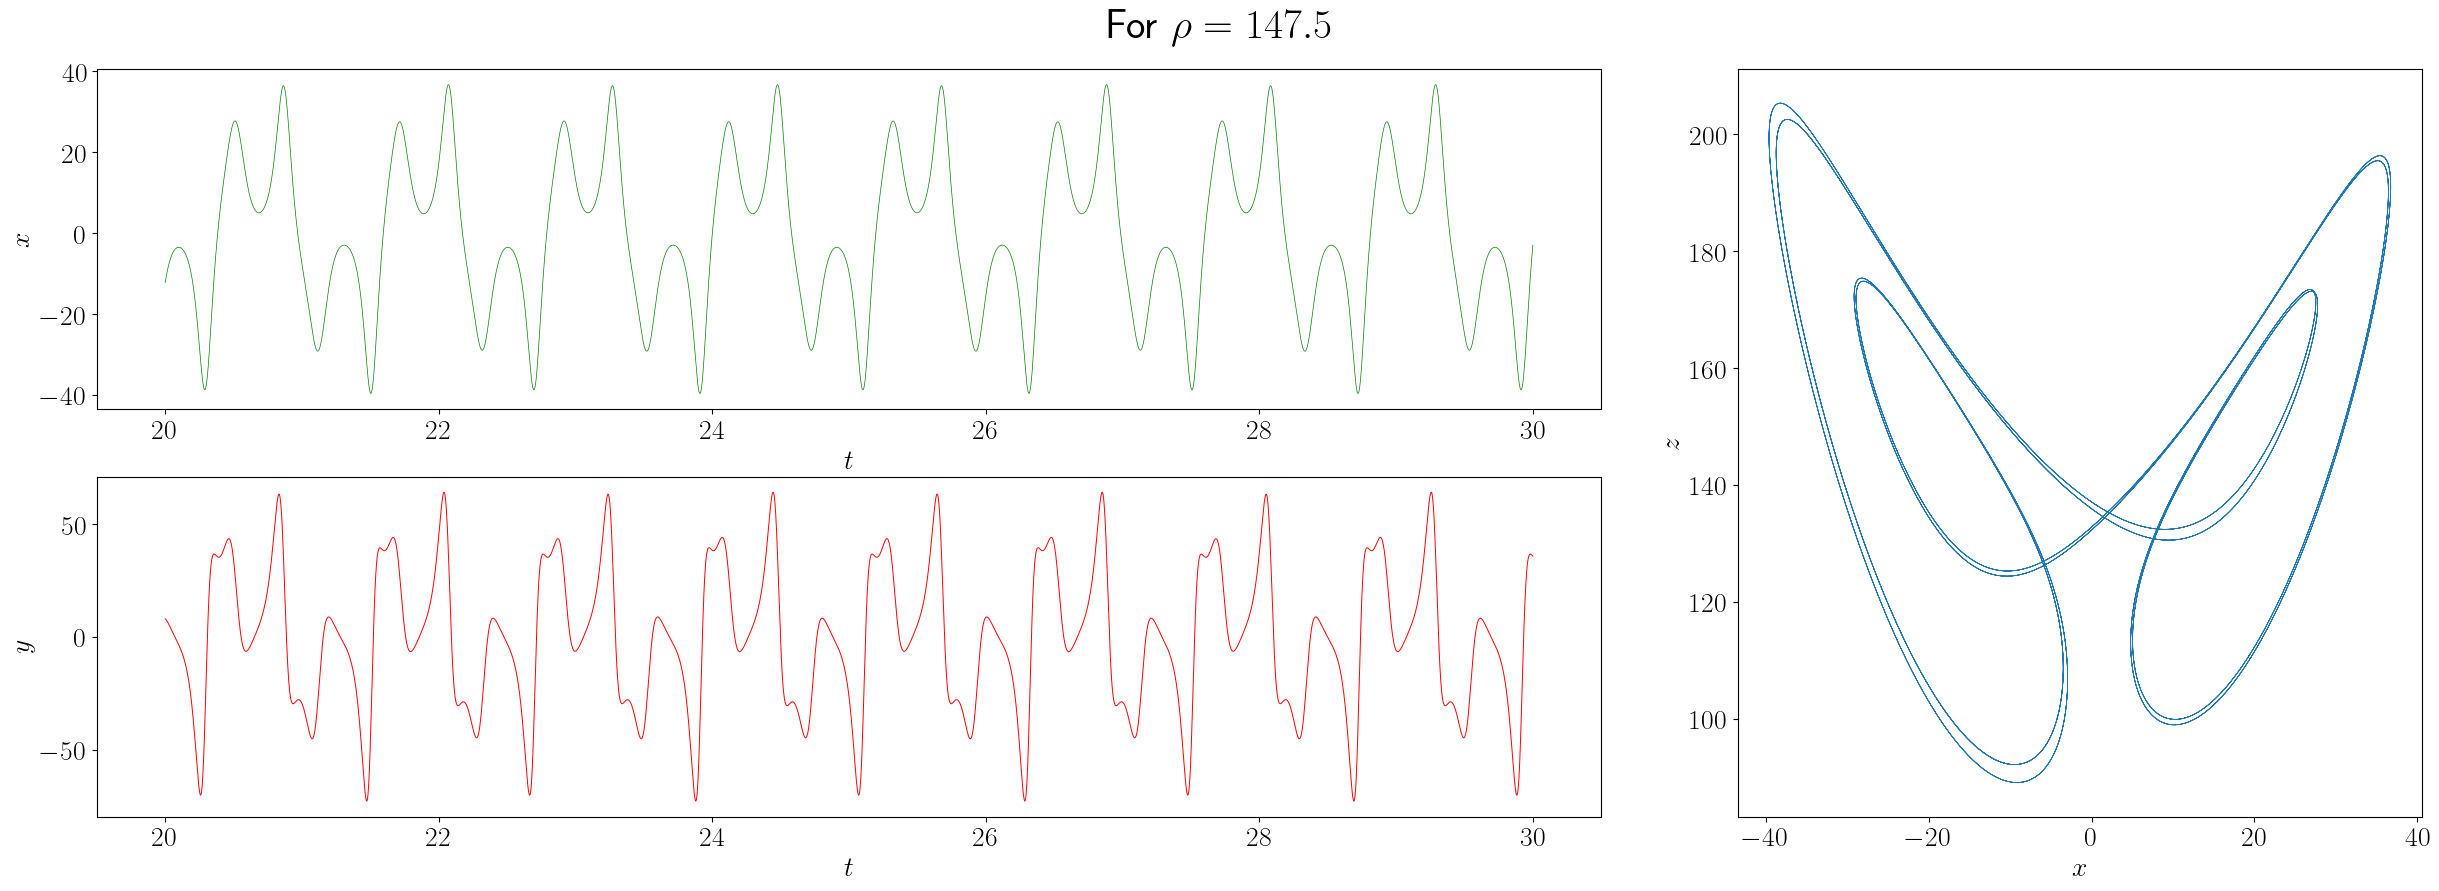

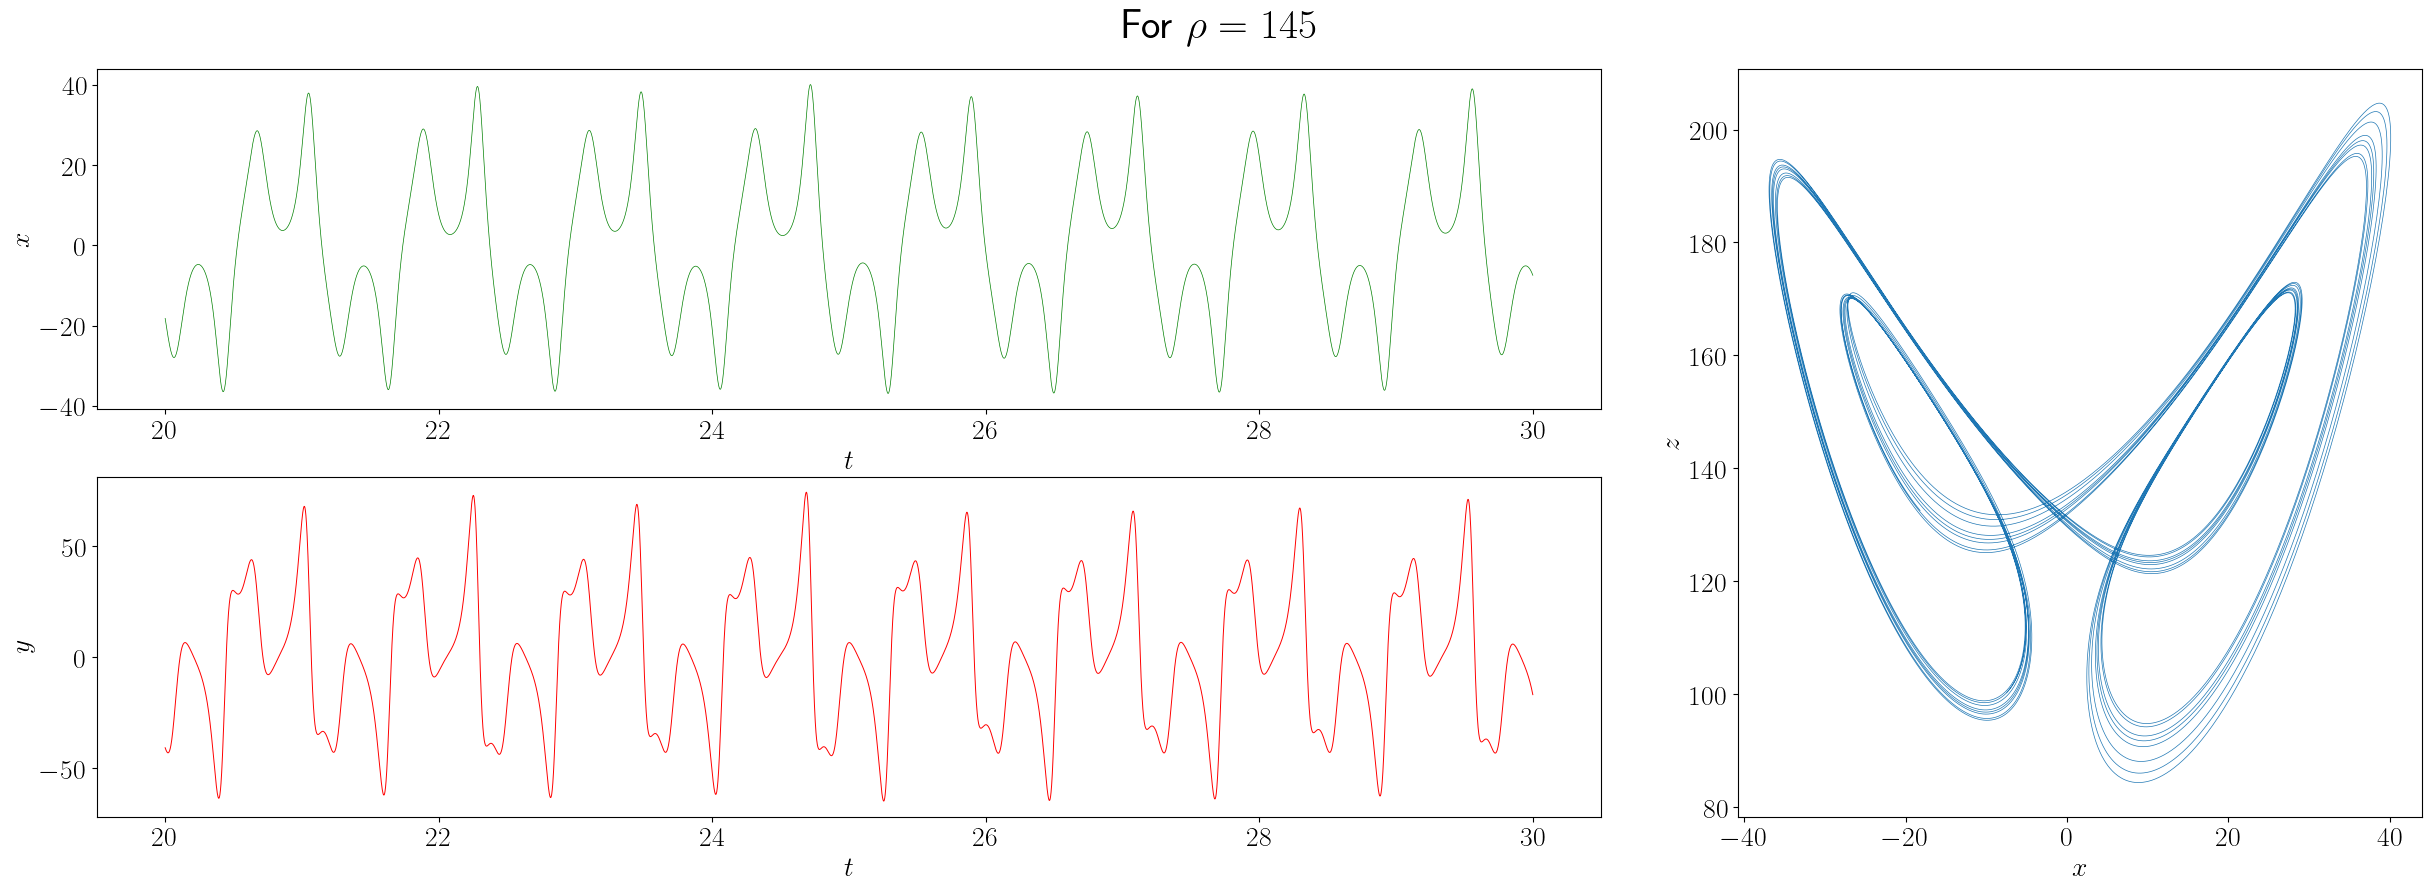

In [37]:
dt = 0.001           # time interval
t_span = [0, 30]
y = [10,-10,0]
sigma = 10.    # constant in Lorentz eqs
b =  8./3.

for r in [166.3, 212, 167.1, 166, 160, 155, 154, 148.5, 148, 147.5, 145]:
    const = sigma, b, r
    t, M = RK4(Lf, t_span, const, dt, y)
    xx,yy,zz = M[:,0],M[:,1],M[:,2]
    fig = plt.figure(figsize=(30,15))
    fig.suptitle( r'For $\rho = {}$'.format(r),fontsize=30,y=0.92)
    gs=fig.add_gridspec(3,3)
    ax1=fig.add_subplot(gs[0,0:2])
    ax2=fig.add_subplot(gs[1,0:2])
    ax3=fig.add_subplot(gs[:2,2])
    ax1.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$x$')
    ax2.set_xlabel(r'$t$')
    ax2.set_ylabel(r'$y$')
    ax3.set_xlabel(r'$x$')
    ax3.set_ylabel(r'$z$')
    ax1.plot(t[20000:30000],xx[20000:30000],'g', linewidth=0.5)
    ax2.plot(t[20000:30000],yy[20000:30000],'r', linewidth=0.7)
    ax3.plot(xx[20000:30000], zz[20000:30000], linewidth=0.5)
    plt.show()

Investigate the simplified version of the $\bf{\text{Lorenz attractors}}$ developed by $\bf{\text{R}}\ddot{o}\bf{\text{essler}}$ [Becker(86)]:                                               
$ \quad \dot{x} = −y − z $                                                                                                      
$\quad \dot{y} = x + ay $                                                                                                        
$\quad \dot{z} = b + xz − cz $                                                                                                        
$\quad (a, b, c) = (0.2, 0.2, 5.7). $                                                                                                            
a. Compute and plot $x(t), y(t),$ and $z(t)$ as functions of time.                                                                 
b. Plot projections of your solutions onto the $(x, y)$ and $(x, \dot{x})$ planes.                                                       
c. Make a Poincaré mapping of the transverse section $\dot{x} = 0$.                                                                      
$\quad $(A Poincaré mapping is the intersection of a periodic orbit in the phase space with a lower-dimensional subspace.)               
d. When $\dot{x} = 0, x$ has an extremum. Plot the value of the extrema $x_{i+1}$ as a function of the previous extremum $x_i$.

In [41]:
def Rf(t,y,const):      # RHS equation
    const = a,b,c
    rhs = [0]*(3)  # 3 coupled eqs.
    rhs[0] = -y[1]-y[2]            # xdot =  -y-z
    rhs[1] = y[0] + a*y[1]         # ydot = x+ay
    rhs[2] = b + y[0]*y[2]-c*y[2]  # zdot = b+xz-cz
    return rhs

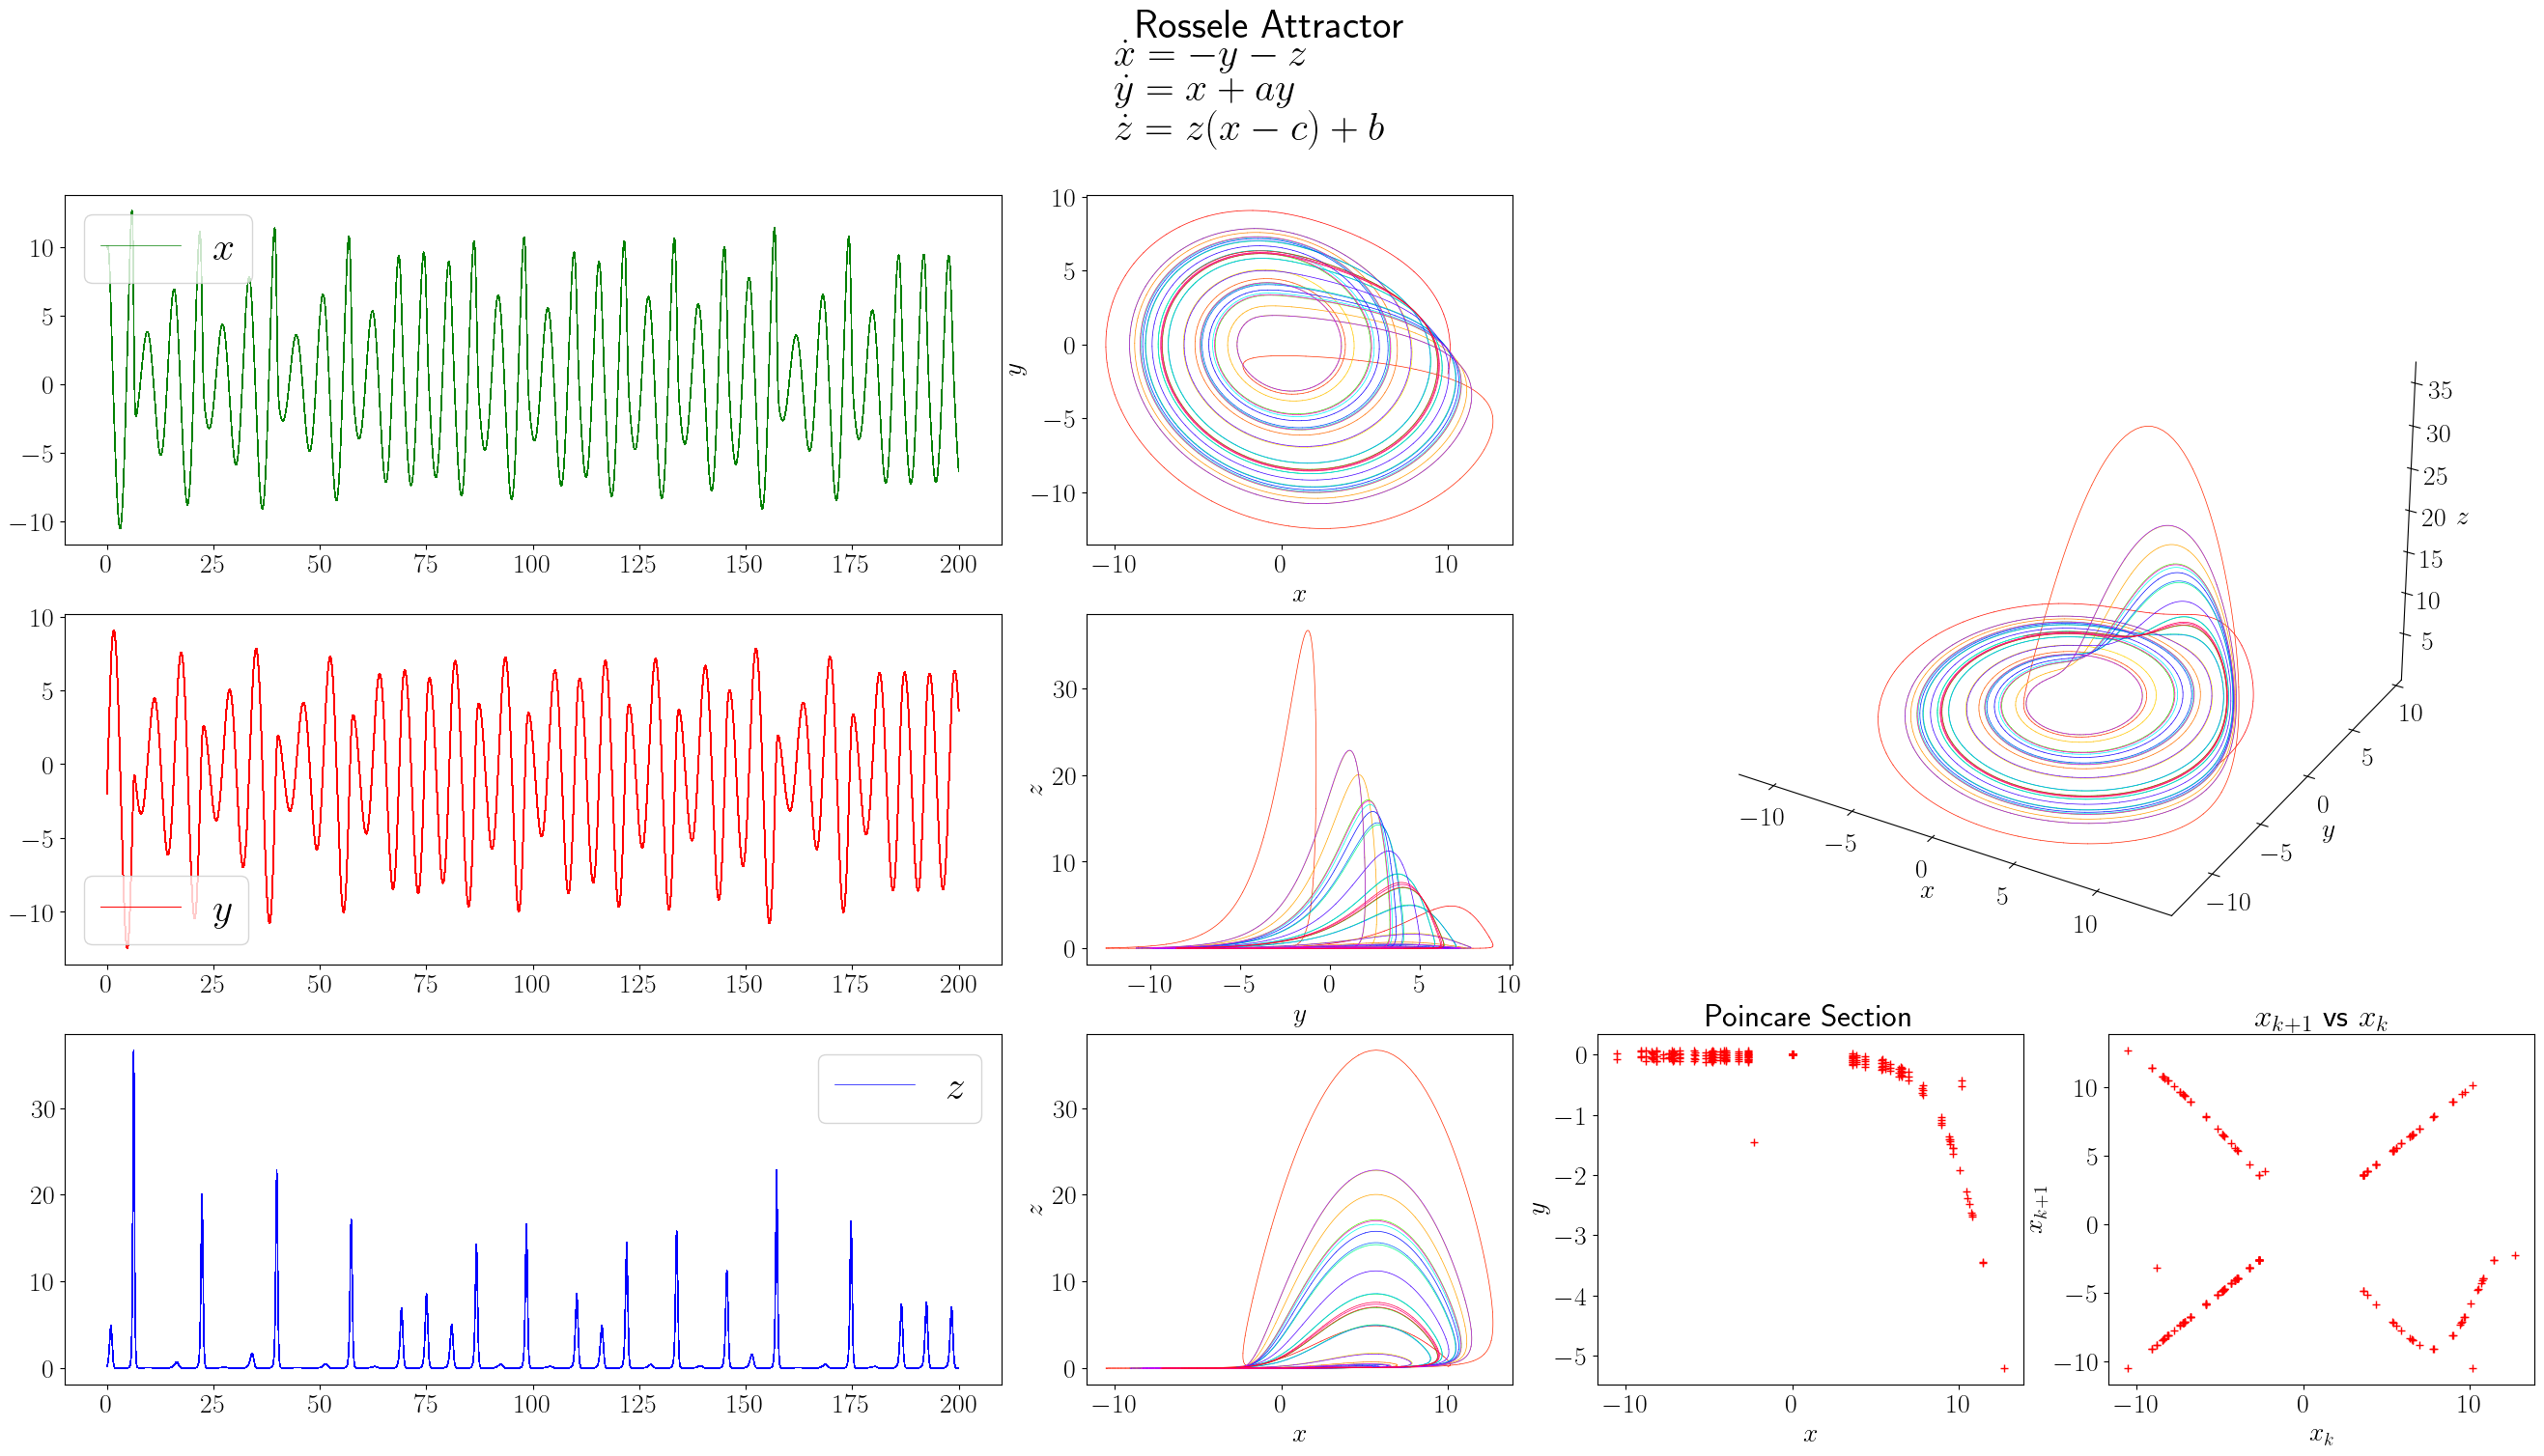

In [43]:
dt = 0.01 
t_span = [0,200]
y = [10, -2, 0.2]
a = 0.2       
b = 0.2      
c = 5.7
const = a,b,c    

t, M = RK4(Rf, t_span, const, dt, y)
xx,yy,zz = M[:,0],M[:,1],M[:,2]

ydo = [0]*int(len(t)/2)
xdo = [0]*int(len(t)/2)
xexp = []
xexm = []
j = 1
for i in range(len(t)):
    xd = -yy[i]-zz[i]
    if xd >-0.1 and xd<0.1:  # for Poincare map
        xdo[j] = xx[i]
        ydo[j] = yy[i]
        xexp.append(xdo[j])   # to plot xk+1 vs xk
        xexm.append(xdo[j-1])
        j += 1
        
        
fig = plt.figure(figsize=(33,16))
fig.suptitle('Rossele Attractor'+ r'$ \\ \dot{x}= -y-z  \\ \dot{y}= x+ay \\ \dot{z}= z(x- c)+b $',
              fontsize=30,y=1.)
gs=fig.add_gridspec(3,5)
ax1=fig.add_subplot(gs[0:2,3:5],projection='3d')
ax2=fig.add_subplot(gs[0,0:2])
ax3=fig.add_subplot(gs[1,0:2])
ax4=fig.add_subplot(gs[2,0:2])
ax5=fig.add_subplot(gs[0,2])
ax6=fig.add_subplot(gs[1,2])
ax7=fig.add_subplot(gs[2,2])
ax8=fig.add_subplot(gs[2,3])
ax9=fig.add_subplot(gs[2,4])
ax1.xaxis.set_pane_color((1,1,1,1))
ax1.yaxis.set_pane_color((1,1,1,1))
ax1.zaxis.set_pane_color((1,1,1,1))
ax1.xaxis.pane.set_edgecolor('w')
ax1.yaxis.pane.set_edgecolor('w')
ax1.zaxis.pane.set_edgecolor('w')
ax1.grid(False)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$z$')
ax5.set_xlabel(r'$x$')
ax5.set_ylabel(r'$y$')
ax6.set_xlabel(r'$y$')
ax6.set_ylabel(r'$z$')
ax7.set_xlabel(r'$x$')
ax7.set_ylabel(r'$z$')
ax8.set_xlabel(r'$x$')
ax8.set_ylabel(r'$y$')
ax9.set_xlabel('$x_k$')
ax9.set_ylabel('$x_{k+1}$')
ax8.set_title("Poincare Section")
ax9.set_title('$x_{k+1}$ vs $x_k$')
s = 10
n = len(t)
for i in range(0,n-s,s):
    ax1.plot(xx[i:i+s+1], yy[i:i+s+1], zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax2.plot(t,xx,'g', linewidth=0.5)
    ax3.plot(t,yy,'r', linewidth=0.7)
    ax4.plot(t,zz,'b', linewidth=0.5)
    ax5.plot(xx[i:i+s+1],yy[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax6.plot(yy[i:i+s+1],zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax7.plot(xx[i:i+s+1],zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
ax2.legend([r'$x$'])
ax3.legend([r'$y$'])
ax4.legend([r'$z$'])
ax8.plot(xdo,ydo,'r+')
ax9.plot(xexm[1:],xexp[1:],'r+')
plt.show()

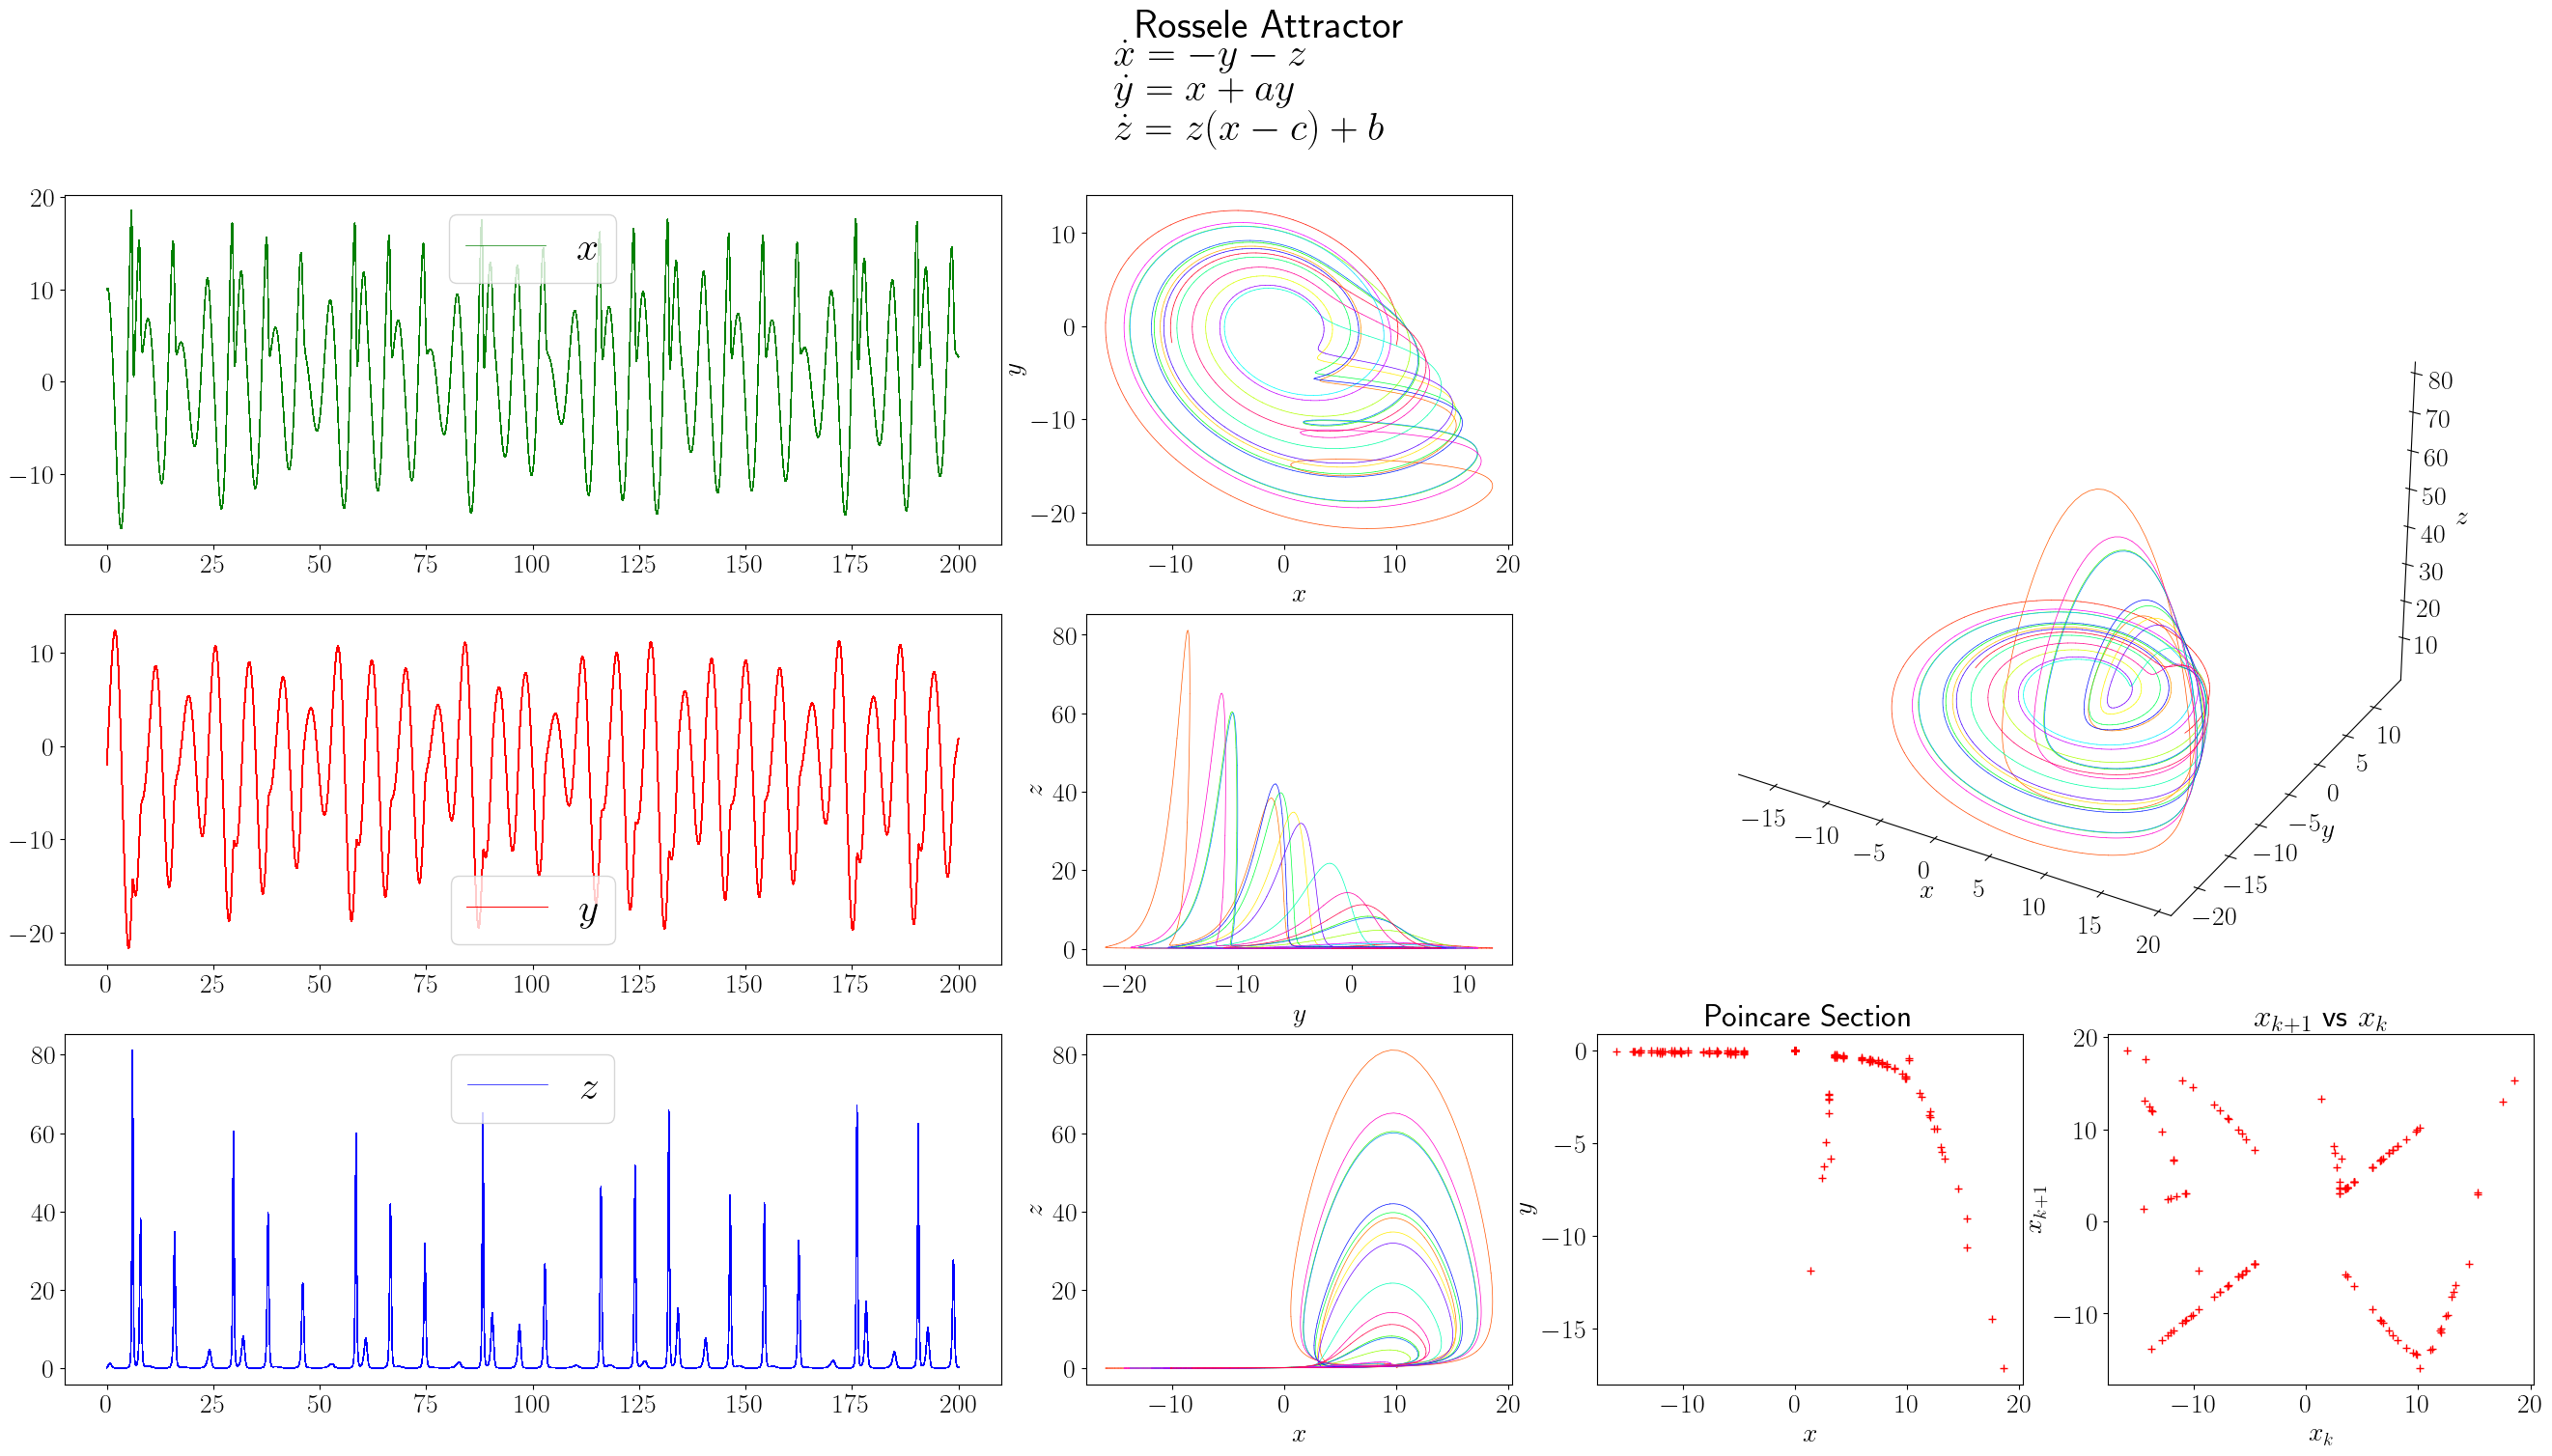

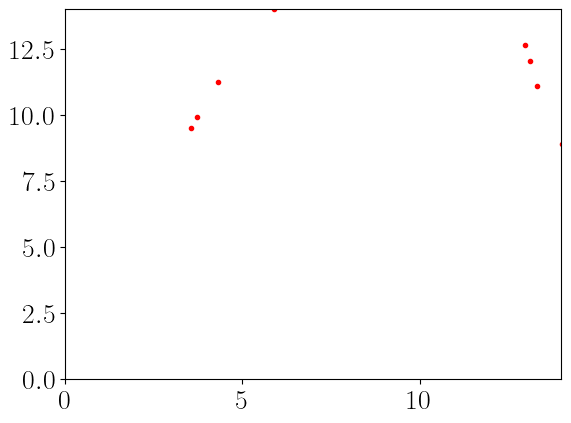

In [44]:
dt = 0.01 
j = 1
t_span = [0,200]

y = [10, -2, 0.2]

a = 0.343        
b = 1.82      
c = 9.75
const = a,b,c    

t, M = RK4(Rf, t_span, const, dt, y)
xx,yy,zz = M[:,0],M[:,1],M[:,2]
ydo = [0]*int(len(t)/2)
xdo = [0]*int(len(t)/2)
xexp = []
xexm = []
for i in range(len(t)):
    xd = -yy[i]-zz[i]
    if xd >-0.1 and xd<0.1:  # for Poincare map
        xdo[j] = xx[i]
        ydo[j] = yy[i]
        xexp.append(xdo[j])   # to plot xk+1 vs xk
        xexm.append(xdo[j-1])
        j += 1
    
fig = plt.figure(figsize=(33,16))
fig.suptitle('Rossele Attractor'+ r'$ \\ \dot{x}= -y-z  \\ \dot{y}= x+ay \\ \dot{z}= z(x- c)+b $',
              fontsize=30,y=1.)
gs=fig.add_gridspec(3,5)
ax1=fig.add_subplot(gs[0:2,3:5],projection='3d')
ax2=fig.add_subplot(gs[0,0:2])
ax3=fig.add_subplot(gs[1,0:2])
ax4=fig.add_subplot(gs[2,0:2])
ax5=fig.add_subplot(gs[0,2])
ax6=fig.add_subplot(gs[1,2])
ax7=fig.add_subplot(gs[2,2])
ax8=fig.add_subplot(gs[2,3])
ax9=fig.add_subplot(gs[2,4])
ax1.xaxis.set_pane_color((1,1,1,1))
ax1.yaxis.set_pane_color((1,1,1,1))
ax1.zaxis.set_pane_color((1,1,1,1))
ax1.xaxis.pane.set_edgecolor('w')
ax1.yaxis.pane.set_edgecolor('w')
ax1.zaxis.pane.set_edgecolor('w')
ax1.grid(False)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$z$')
ax5.set_xlabel(r'$x$')
ax5.set_ylabel(r'$y$')
ax6.set_xlabel(r'$y$')
ax6.set_ylabel(r'$z$')
ax7.set_xlabel(r'$x$')
ax7.set_ylabel(r'$z$')
ax8.set_xlabel(r'$x$')
ax8.set_ylabel(r'$y$')
ax9.set_xlabel('$x_k$')
ax9.set_ylabel('$x_{k+1}$')
ax8.set_title("Poincare Section")
ax9.set_title('$x_{k+1}$ vs $x_k$')
s = 10
n = 10000
for i in range(0,n-s,s):
    ax1.plot(xx[i:i+s+1], yy[i:i+s+1], zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax2.plot(t,xx,'g', linewidth=0.5)
    ax3.plot(t,yy,'r', linewidth=0.7)
    ax4.plot(t,zz,'b', linewidth=0.5)
    ax5.plot(xx[i:i+s+1],yy[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax6.plot(yy[i:i+s+1],zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax7.plot(xx[i:i+s+1],zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
ax2.legend([r'$x$'])
ax3.legend([r'$y$'])
ax4.legend([r'$z$'])
ax8.plot(xdo,ydo,'r+')
ax9.plot(xexm[1:],xexp[1:],'r+')
plt.show()

xmax = FindMaxima(xx)
plt.plot(xmax[1:-2], xmax[2:-1], 'r.')
plt.xlim([0,14])
plt.ylim([0,14])
plt.show()